# Credit EDA Case Study - Loan Deafult Analysis

## Nirakar Padhy - nirakarpadhy001@gmail.com

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TO-DO: Finding Columns with high missing values imputing them with appropriate value, Finding Outliers and removing/capping them if necessary or leave them be if the values could be possible, Converting Variables to suitable data types, etc.

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Reading application dataset
df = pd.read_csv("application_data.csv")

In [4]:
#shape(nrows x ncols) of dataset
df.shape

(307511, 122)

In [5]:
# Finding the missing values % for each column
dfLen = len(df)
df.isnull().sum()/dfLen * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [6]:
# Finding columns having more than 20% missing values
nacols = df.isnull().sum()/dfLen * 100
nacols = nacols[nacols.values > 0.2]
len(nacols)

63

### Note: len(nacols) doesnt doesn't change from 63 for any value beyond 10% missing values

In [7]:
# Removing these 63 columns with missing values >= 10%
df.drop(labels = list(nacols.index),axis=1,inplace=True)
df.shape    #ncols changes to 122 - 63 = 59

(307511, 59)

In [8]:
df.isnull().sum()/dfLen * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000


### 'AMT_ANNUITY' and 'AMT_GOODS_PRICE' columns have 0.3% and 9% missing values. So let's try to fill the missing values in these colums and ignore other two columns since they have missing values < 0.07% 

In [9]:
round(df[['AMT_ANNUITY','AMT_GOODS_PRICE']].describe(),2)

AMT_ANNUITY  AMT_GOODS_PRICE
count    307499.00        307233.00
mean      27108.57        538396.21
std       14493.74        369446.46
min        1615.50         40500.00
25%       16524.00        238500.00
50%       24903.00        450000.00
75%       34596.00        679500.00
max      258025.50       4050000.00

In [10]:
#the maximum value in 'AMT_ANNUITY' and 'AMT_GOODS_PRICE' is greater than the difference between its 75th
# perecentile and the minimmum value so there we can't use mean to inpute missing values 
#we should maybe remove these outliers if they're false but it's possible they're legitimate
print(max(df['AMT_ANNUITY']) > df['AMT_ANNUITY'].quantile(0.75) - min(df['AMT_ANNUITY']))
print(max(df['AMT_GOODS_PRICE']) > df['AMT_GOODS_PRICE'].quantile(0.75) - min(df['AMT_GOODS_PRICE']))

True
True


In [11]:
# Filling missing values with median
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=df['AMT_ANNUITY'].median()
df.loc[df['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].median()

In [12]:
# Searching for the column for null values
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

In [13]:
df.shape

(307511, 59)

In [14]:
# Removing rows having all null values 
df.dropna(axis=0,inplace=True,how='any')
df.shape                #nrows changes to 307511 - 3 = 307508

(307508, 59)

In [15]:
# Removing irrelevant columns from this dataset
irrelevant = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels = irrelevant, axis=1, inplace=True)

In [16]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion

In [17]:
for x in df.columns:
    print(df[x].value_counts())
    print("\n")

100401    1
241119    1
245213    1
243164    1
230874    1
         ..
154398    1
148253    1
150300    1
160539    1
100303    1
Name: SK_ID_CURR, Length: 307508, dtype: int64


0    282683
1     24825
Name: TARGET, dtype: int64


Cash loans         278231
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64


F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64


N    202922
Y    104586
Name: FLAG_OWN_CAR, dtype: int64


Y    213309
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


0     215368
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
83479.5         1
44955.0         1
78916.5         1
37008.0         1
131125.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int

In [18]:
df['CODE_GENDER'][df['CODE_GENDER']=='XNA']='F'   
df['CODE_GENDER'].value_counts()

<ipython-input-18-771654367815>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CODE_GENDER'][df['CODE_GENDER']=='XNA']='F'


F    202451
M    105057
Name: CODE_GENDER, dtype: int64

In [19]:
df[df['CODE_GENDER']=='XNA']

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE]
Index: []

In [20]:
df['ORGANIZATION_TYPE'][df['ORGANIZATION_TYPE']=='XNA']='Others' 
df['ORGANIZATION_TYPE'].value_counts()

<ipython-input-20-163074a82837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORGANIZATION_TYPE'][df['ORGANIZATION_TYPE']=='XNA']='Others'


Business Entity Type 3    67992
Others                    55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [21]:
df[df['ORGANIZATION_TYPE']=='XNA']

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE]
Index: []

In [22]:
#checking the data types for all columns
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

In [23]:
df.convert_dtypes().dtypes     #Converting dtypes to appropriate type

SK_ID_CURR                       Int64
TARGET                           Int64
NAME_CONTRACT_TYPE              string
CODE_GENDER                     string
FLAG_OWN_CAR                    string
FLAG_OWN_REALTY                 string
CNT_CHILDREN                     Int64
AMT_INCOME_TOTAL               Float64
AMT_CREDIT                     Float64
AMT_ANNUITY                    Float64
AMT_GOODS_PRICE                Float64
NAME_INCOME_TYPE                string
NAME_EDUCATION_TYPE             string
NAME_FAMILY_STATUS              string
NAME_HOUSING_TYPE               string
REGION_POPULATION_RELATIVE     Float64
DAYS_BIRTH                       Int64
DAYS_EMPLOYED                    Int64
DAYS_REGISTRATION              Float64
DAYS_ID_PUBLISH                  Int64
WEEKDAY_APPR_PROCESS_START      string
HOUR_APPR_PROCESS_START          Int64
REG_REGION_NOT_LIVE_REGION       Int64
REG_REGION_NOT_WORK_REGION       Int64
LIVE_REGION_NOT_WORK_REGION      Int64
REG_CITY_NOT_LIVE_CITY   

### Data Understanding and Column description for further analysis!

------------------------------------------------

## DERIVING FEATURES from existing Variables

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [24]:
round(df[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe())

AMT_INCOME_TOTAL  AMT_CREDIT
count          307508.0    307508.0
mean           168797.0    599027.0
std            237124.0    402492.0
min             25650.0     45000.0
25%            112500.0    270000.0
50%            147150.0    513531.0
75%            202500.0    808650.0
max         117000000.0   4050000.0

In [25]:
# Creating bins for income amount using quantiles

bins = [0.,0.25,0.5,0.75,0.99,1.]
labs = ["low","med","med_high","high","extra_high"]

df['AMT_INCOME_RANGE']=pd.qcut(df['AMT_INCOME_TOTAL'],q=bins,labels=labs)

In [26]:
# Creating bins for Credit amount using quantiles

bins = [0.,0.30,0.60,0.95,1.]
labs = ["low","med","high","extra_high"]

df['AMT_CREDIT_RANGE']=pd.qcut(df['AMT_CREDIT'],q=bins,labels=labs)

In [27]:
for x in ['AMT_INCOME_RANGE','AMT_CREDIT_RANGE']:
    print(df[x].value_counts())
    print("\n")

low           100578
med_high       82212
high           68523
med            53181
extra_high      3014
Name: AMT_INCOME_RANGE, dtype: int64


high          108901
low            92315
med            92258
extra_high     14034
Name: AMT_CREDIT_RANGE, dtype: int64




In [28]:
# the target column has two categories viz., 
# target=1(client with payment difficulties i.e, default risk) and target=0(all other cases)

target0 = df.loc[df["TARGET"]==0]
target1 = df.loc[df["TARGET"]==1]


In [29]:
target0.shape, target1.shape

((282683, 31), (24825, 31))

In [30]:
#Imbalance in target column
print(len(target0)/len(df)*100)
print(len(target1)/len(df)*100)

91.92703929653862
8.072960703461373


In [31]:
#Imbalance in target column
print(len(target0)/len(target1))

11.387029204431018


## The Imbalance ratio is 11.39

## TO-DO: Univariate and Bivariate analysis of Categorial and Numerical Columns

## Univariate analysis for categories

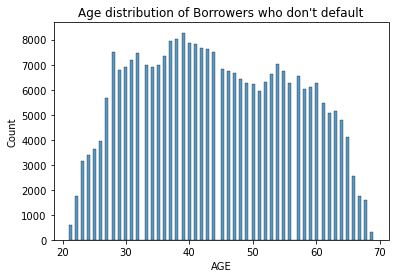

In [32]:
plt.title("Age distribution of Borrowers who don't default")
sns.histplot(round(target0['DAYS_BIRTH']/365 * -1),bins=100)
plt.xlabel("AGE")
plt.show()

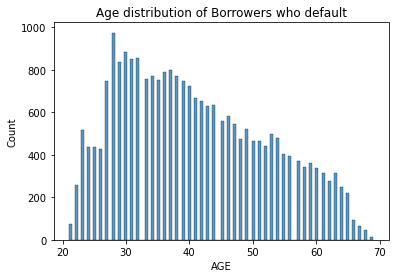

In [33]:
plt.title("Age distribution of Borrowers who default")
sns.histplot(round(target1['DAYS_BIRTH']/365 * -1),bins=100)
plt.xlabel("AGE")
plt.show()

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


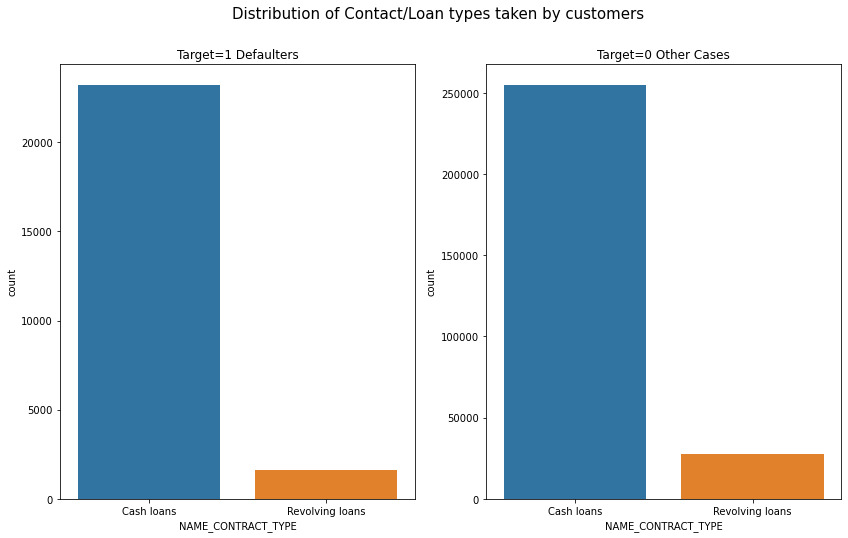

In [34]:
fig, ax = plt.subplots(1,2, figsize = (14,8))
fig.suptitle("Distribution of Contact/Loan types taken by customers",size=15)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['NAME_CONTRACT_TYPE'],ax=ax[0])
sns.countplot(target0['NAME_CONTRACT_TYPE'],ax=ax[1])
plt.show()

In [35]:
# Most Loans are Cash Loans 

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


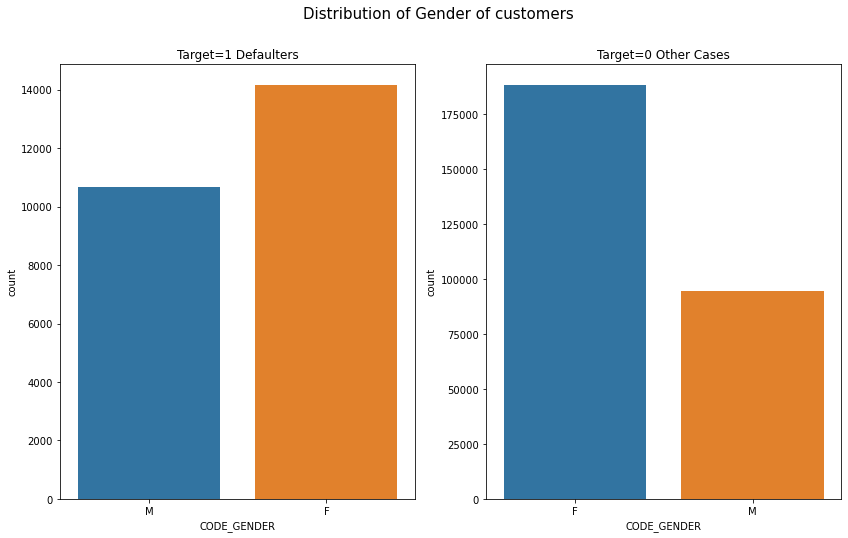

<Figure size 720x432 with 0 Axes>

In [36]:
fig, ax = plt.subplots(1,2, figsize = (14,8))
plt.figure(figsize=(10,6))
fig.suptitle("Distribution of Gender of customers",size=15)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['CODE_GENDER'],ax=ax[0])
sns.countplot(target0['CODE_GENDER'],ax=ax[1])
plt.show()

In [37]:
# Most Applicants and Borrowers are Females

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


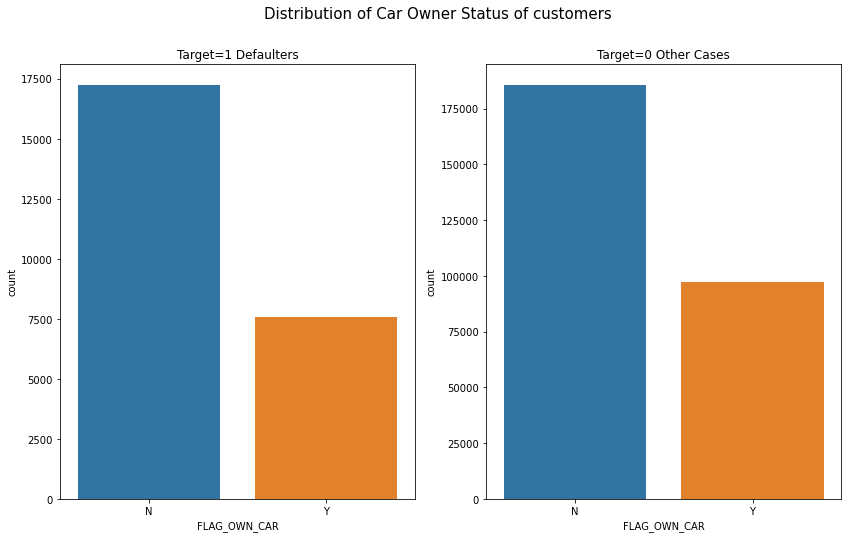

In [38]:
fig, ax = plt.subplots(1,2, figsize = (14,8))
fig.suptitle("Distribution of Car Owner Status of customers",size=15)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['FLAG_OWN_CAR'],ax=ax[0])
sns.countplot(target0['FLAG_OWN_CAR'],ax=ax[1])
plt.show()

In [39]:
# Most applicants do not own a Car

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


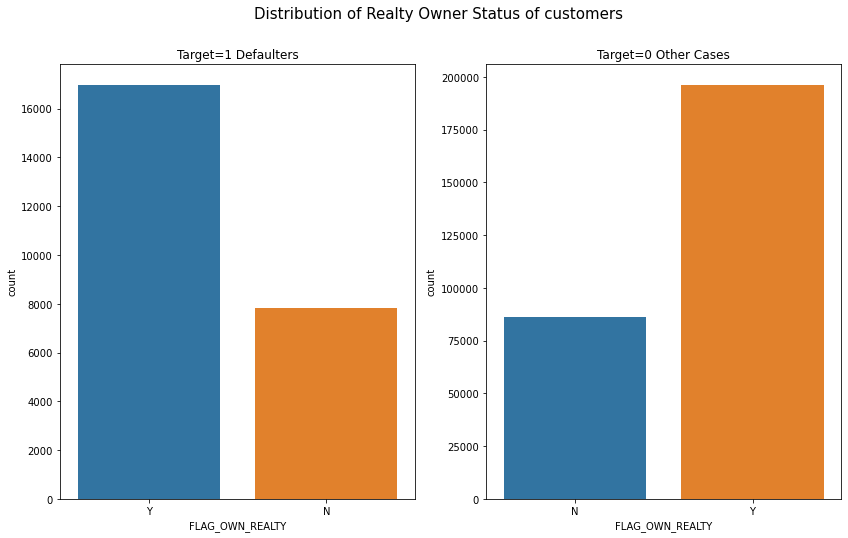

In [40]:
fig, ax = plt.subplots(1,2, figsize = (14,8))
fig.suptitle("Distribution of Realty Owner Status of customers",size=15)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['FLAG_OWN_REALTY'],ax=ax[0])
sns.countplot(target0['FLAG_OWN_REALTY'],ax=ax[1])
plt.show()

In [41]:
# Most applicants are Realty owners 

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


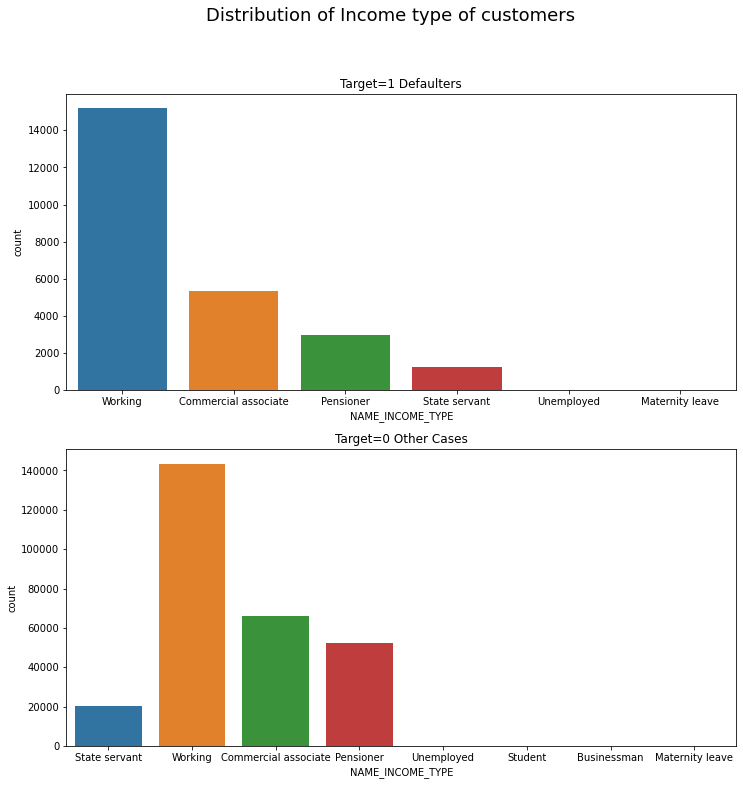

In [42]:
fig, ax = plt.subplots(2,1, figsize = (12,12))
fig.suptitle("Distribution of Income type of customers",size=18)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['NAME_INCOME_TYPE'],ax=ax[0])
sns.countplot(target0['NAME_INCOME_TYPE'],ax=ax[1])
plt.show()

In [43]:
# Most applicants are either from Working, Comercial associate or Pensioners categories

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


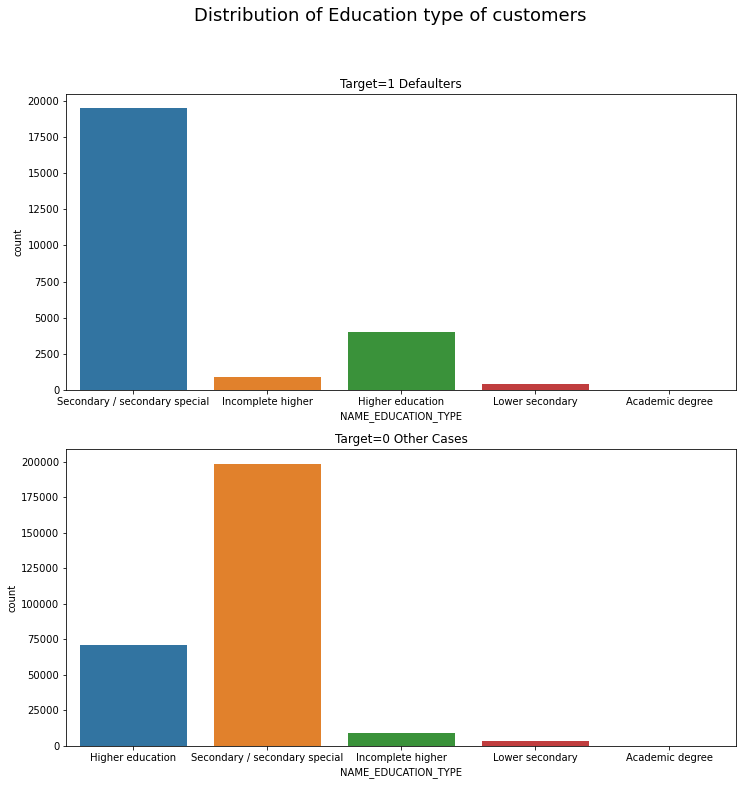

In [44]:
fig, ax = plt.subplots(2,1, figsize = (12,12))
fig.suptitle("Distribution of Education type of customers",size=18)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['NAME_EDUCATION_TYPE'],ax=ax[0])
sns.countplot(target0['NAME_EDUCATION_TYPE'],ax=ax[1])
plt.show()

In [45]:
# Most applicants have Secondary level Education

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


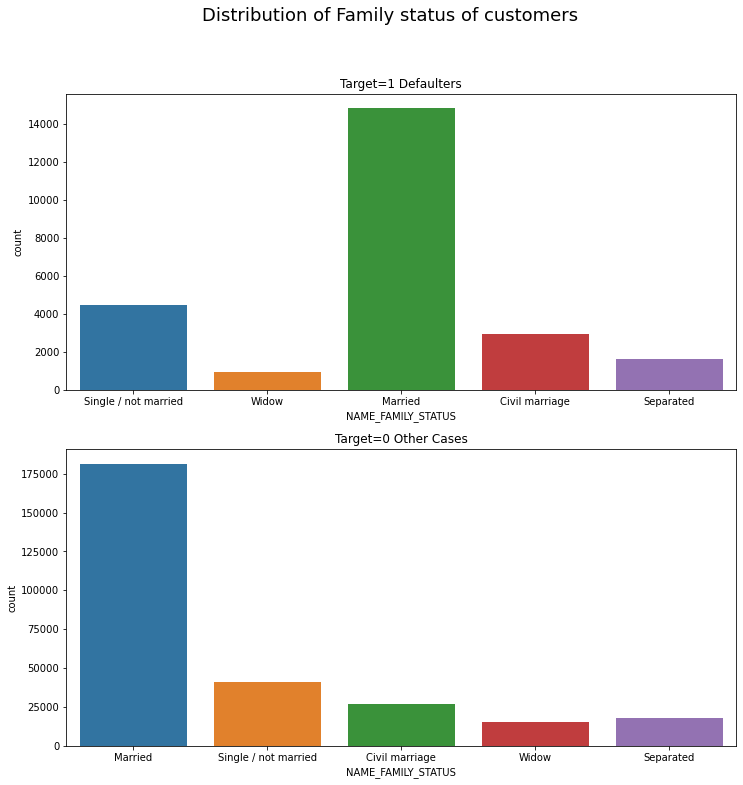

In [46]:
fig, ax = plt.subplots(2,1, figsize = (12,12))
fig.suptitle("Distribution of Family status of customers",size=18)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['NAME_FAMILY_STATUS'],ax=ax[0])
sns.countplot(target0['NAME_FAMILY_STATUS'],ax=ax[1])
plt.show()

In [47]:
# Most applicants are Married

/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nirakar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


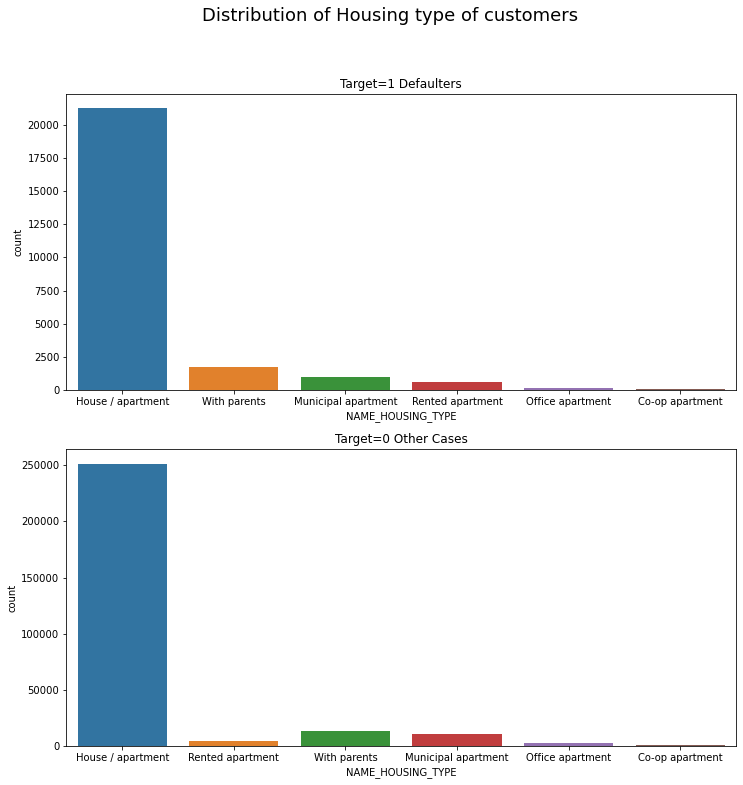

In [48]:
fig, ax = plt.subplots(2,1, figsize = (12,12))
fig.suptitle("Distribution of Housing type of customers",size=18)
ax[0].set_title("Target=1 Defaulters")
ax[1].set_title("Target=0 Other Cases")
sns.countplot(target1['NAME_HOUSING_TYPE'],ax=ax[0])
sns.countplot(target0['NAME_HOUSING_TYPE'],ax=ax[1])
plt.show()

In [49]:
# Most applicants own a House

## Bivariate analysis for categories (sliced by Gender and Target columns) 

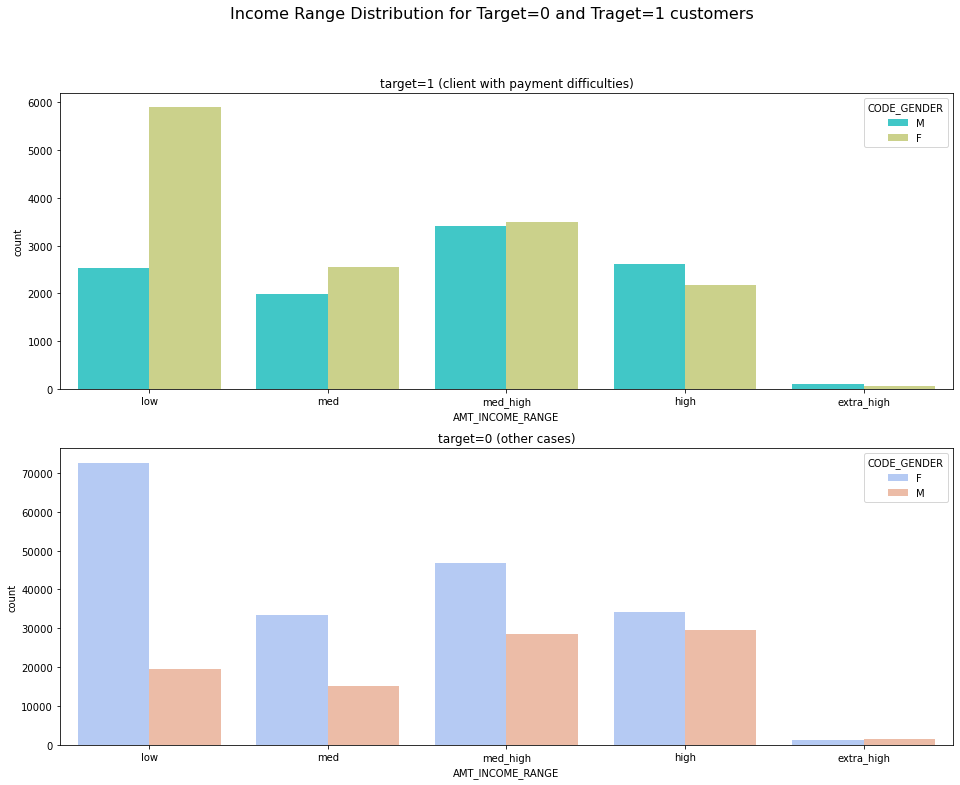

In [50]:
# PLotting Income range Distribution

col='AMT_INCOME_RANGE'

fig, ax = plt.subplots(2,1, figsize = (16,12))

fig.suptitle("Income Range Distribution for Target=0 and Traget=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.countplot(data = target1 , x= col, hue = 'CODE_GENDER',palette='rainbow', ax=ax[0])
sns.countplot(data = target0 , x= col, hue = 'CODE_GENDER',palette='coolwarm', ax=ax[1])

plt.show()

### Highlights from the above graph.

1. No. of Females is more than Males in the data and in almost every income range category except for "high" and "extra high" categories in traget=1 customers and in "extra high" category from target=0 customers
2. Most people have "low"/"med" income in data and No. of people in "extra_high" income range is very less.

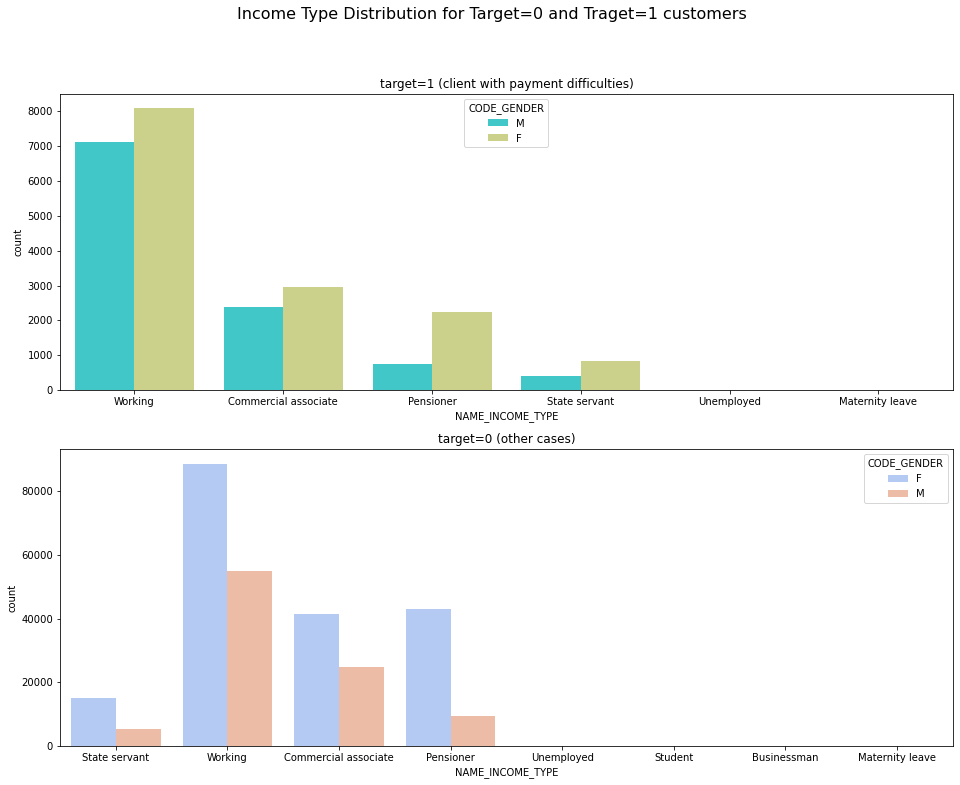

In [51]:
# Plotting Income type distribution

col='NAME_INCOME_TYPE'

fig, ax = plt.subplots(2,1, figsize = (16,12))

fig.suptitle("Income Type Distribution for Target=0 and Traget=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.countplot(data = target0 , x= col, hue = 'CODE_GENDER',palette='coolwarm', ax=ax[1])
sns.countplot(data = target1 , x= col, hue = 'CODE_GENDER',palette='rainbow', ax=ax[0])

plt.show()

### Highlights from the above graph.

1. Most customers are from ‘Working’, ’Commercial associate’ & ‘Pensioner’ income ctageories with Females domainating males in numbers.
2. ‘Student’, ‘Businessman’, 'Unemployed' and ‘Maternity leave’ categories have the least people and noticeably "student" and "businessman" have no payment difficulties because studnets usually rely on parents income and businesses have stable income to repay loans

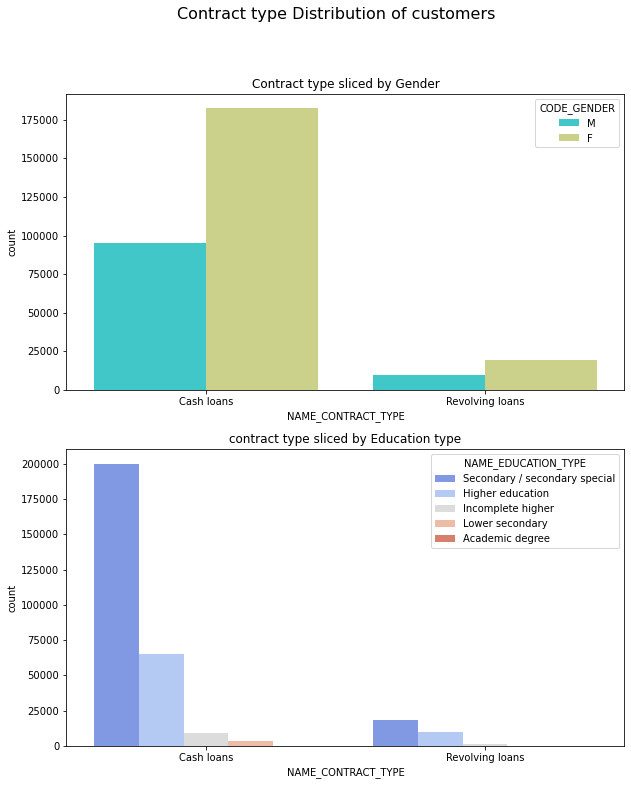

In [52]:
# Plotting Contract type distribution

col='NAME_CONTRACT_TYPE'

fig, ax = plt.subplots(2,1, figsize = (10,12))

fig.suptitle("Contract type Distribution of customers", size=16)

ax[0].set_title("Contract type sliced by Gender")
ax[1].set_title("contract type sliced by Education type")

sns.countplot(data = df , x= col, hue = 'NAME_EDUCATION_TYPE',palette='coolwarm', ax=ax[1])
sns.countplot(data = df , x= col, hue = 'CODE_GENDER',palette='rainbow', ax=ax[0])

plt.show()

### Highlights from the above graph.

1. 'cash loans’ are more popular than ‘Revolving loans’ contract type.
2. 'Female' & 'Secondary' categories in "gender" and "education type" respectively are most popular applicants

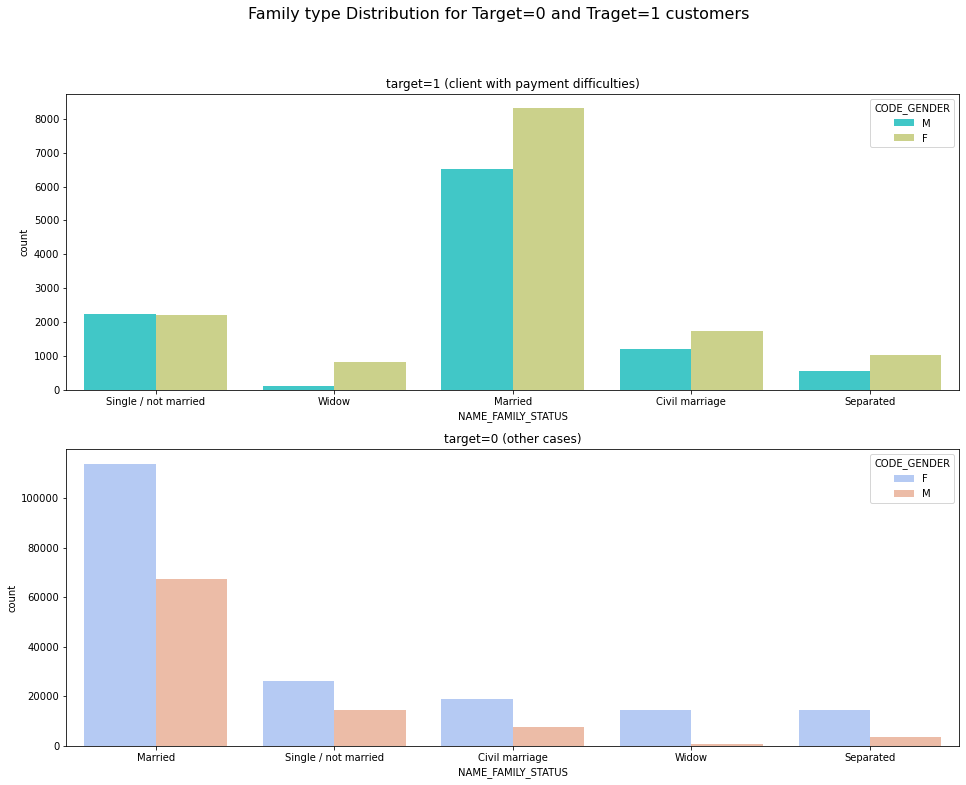

In [53]:
# Plotting Family type distribution

col='NAME_FAMILY_STATUS'

fig, ax = plt.subplots(2,1, figsize = (16,12))

fig.suptitle("Family type Distribution for Target=0 and Traget=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.countplot(data = target0 , x= col, hue = 'CODE_GENDER',palette='coolwarm', ax=ax[1])
sns.countplot(data = target1 , x= col, hue = 'CODE_GENDER',palette='rainbow', ax=ax[0])

plt.show()

### Highlights from the above graph
1. Most applicants are "Married" and "Females" in this category

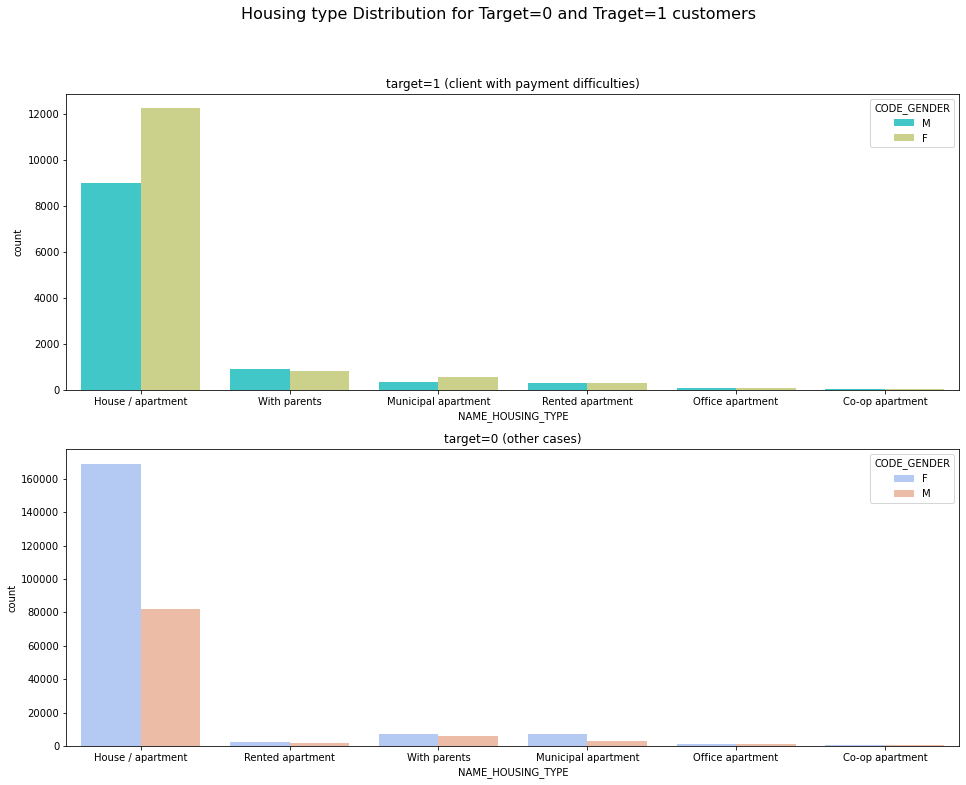

In [54]:
# Plotting Housing type distribution

col='NAME_HOUSING_TYPE'

fig, ax = plt.subplots(2,1, figsize = (16,12))

fig.suptitle("Housing type Distribution for Target=0 and Traget=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.countplot(data = target0 , x= col, hue = 'CODE_GENDER',palette='coolwarm', ax=ax[1])
sns.countplot(data = target1 , x= col, hue = 'CODE_GENDER',palette='rainbow', ax=ax[0])

plt.show()

### Highlights from the above graph
1. Most applicants own a house/apartment with second most applicants live with their parents


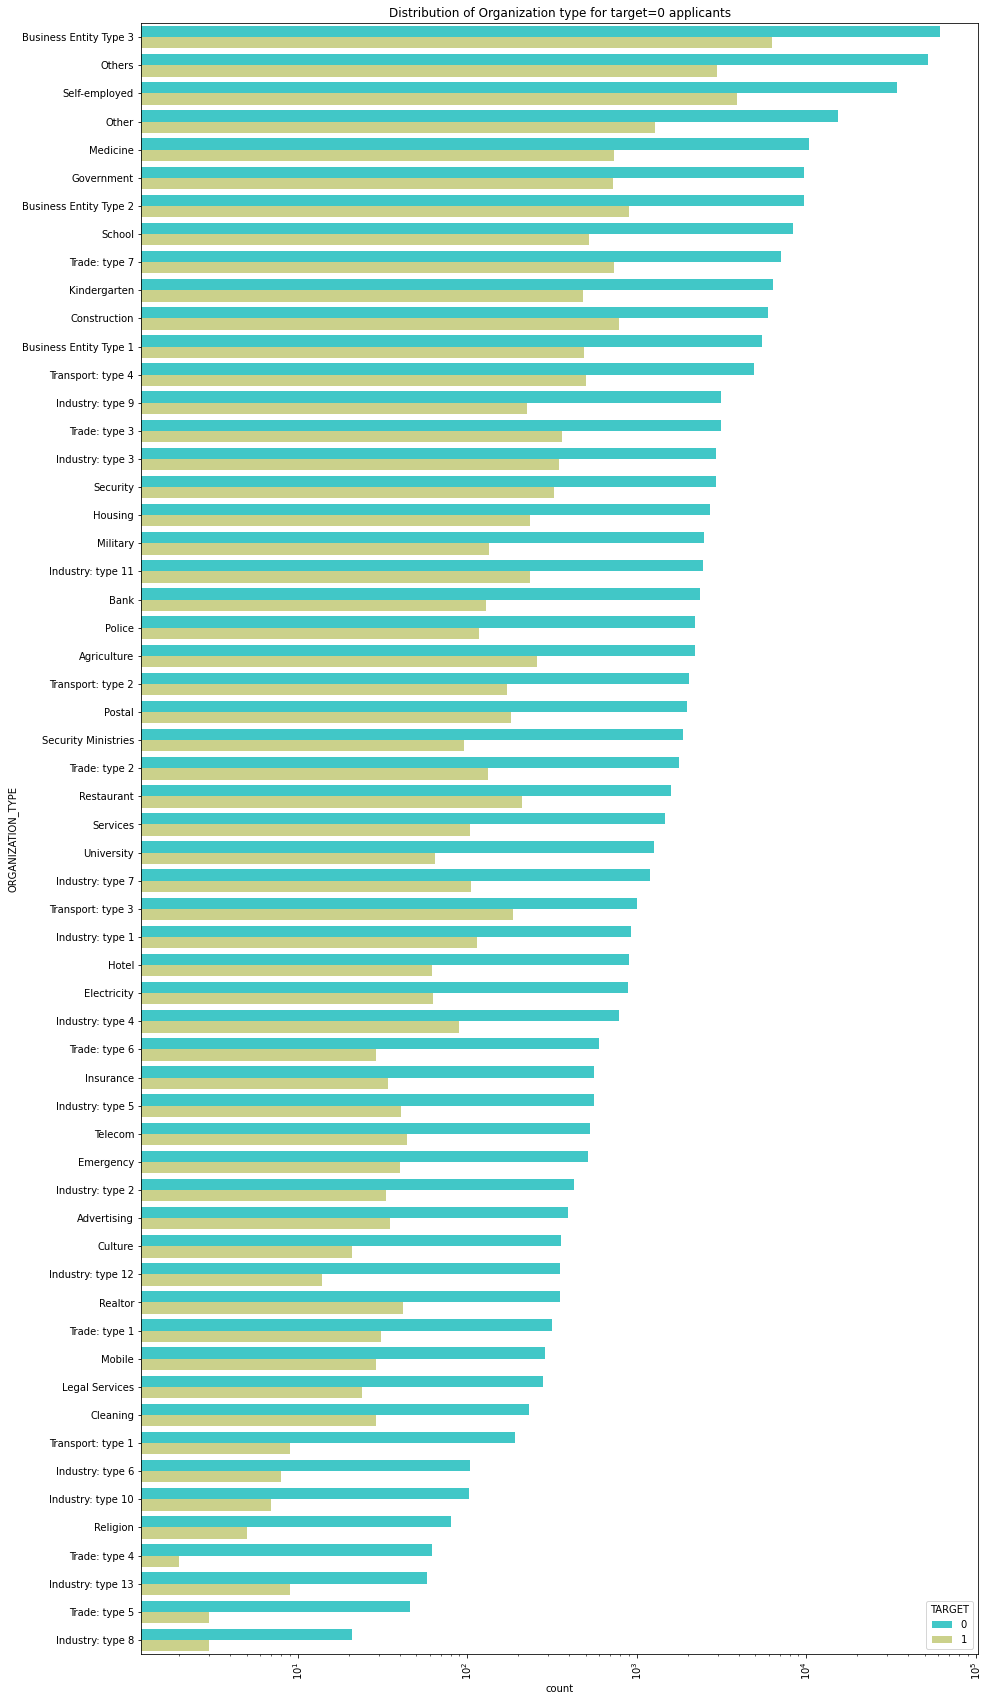

In [55]:
# Plotting for Organization type in logarithmic scale
plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target=0 applicants")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df,hue="TARGET",y='ORGANIZATION_TYPE',palette='rainbow',order=target0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

### NOTE: Most applicants are from org type "business entity type 3" and "self employed". Least applicants are from org type "Industry type 8/13" and "trade type 4/5" 

The bank can try to advertise more to people from industry and trade type who apply for loan less and maybe charge a bit high interest rate for people from "business type 3" and "self employed" who anyways apply the most for loan from banks

In [56]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64


In [57]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','AMT_GOODS_PRICE',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION']

<AxesSubplot:title={'center':'Correlation among Numerical variables in the data target=0'}>

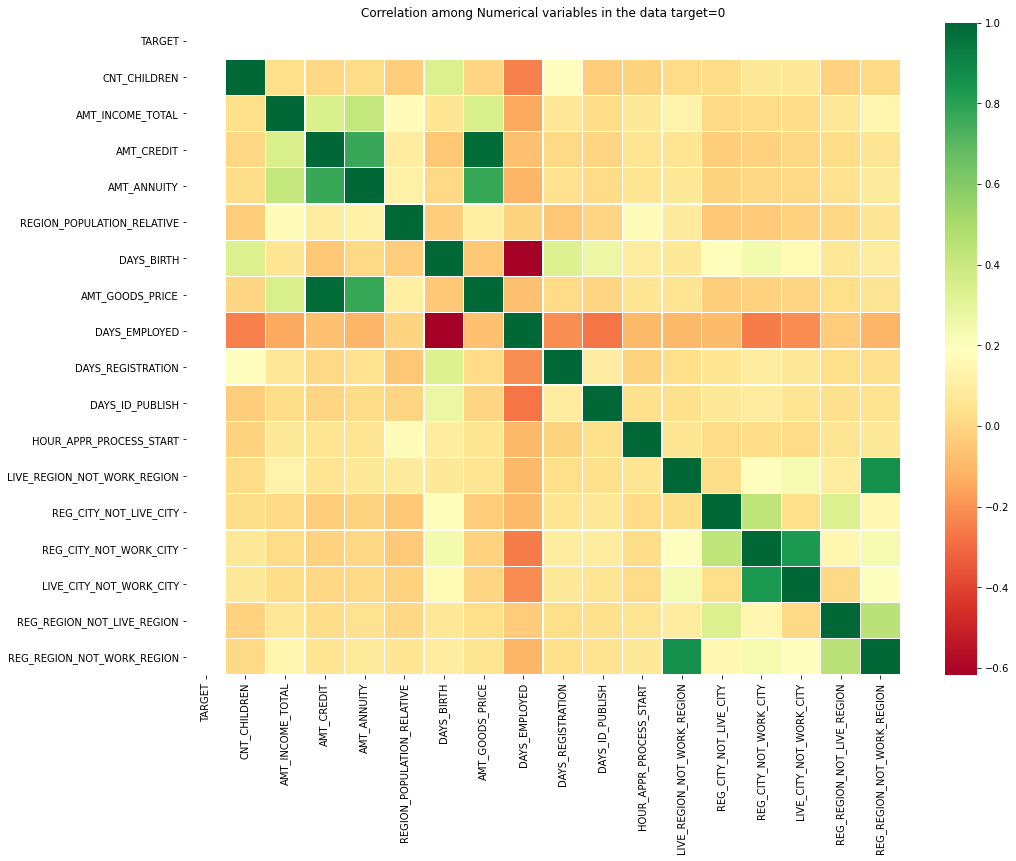

In [58]:
# Correlation in the data
plt.figure(figsize=(16,12))

plt.title("Correlation among Numerical variables in the data target=0")

#scaling/Normalizing the data for better correlations
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
data0 = pd.DataFrame(min_max_scaler.fit_transform(target0[numeric_columns]),columns=numeric_columns)

sns.heatmap(data0.corr(),cmap="RdYlGn",linewidths=0.3)

<AxesSubplot:title={'center':'Correlation among Numerical variables in the data target=1'}>

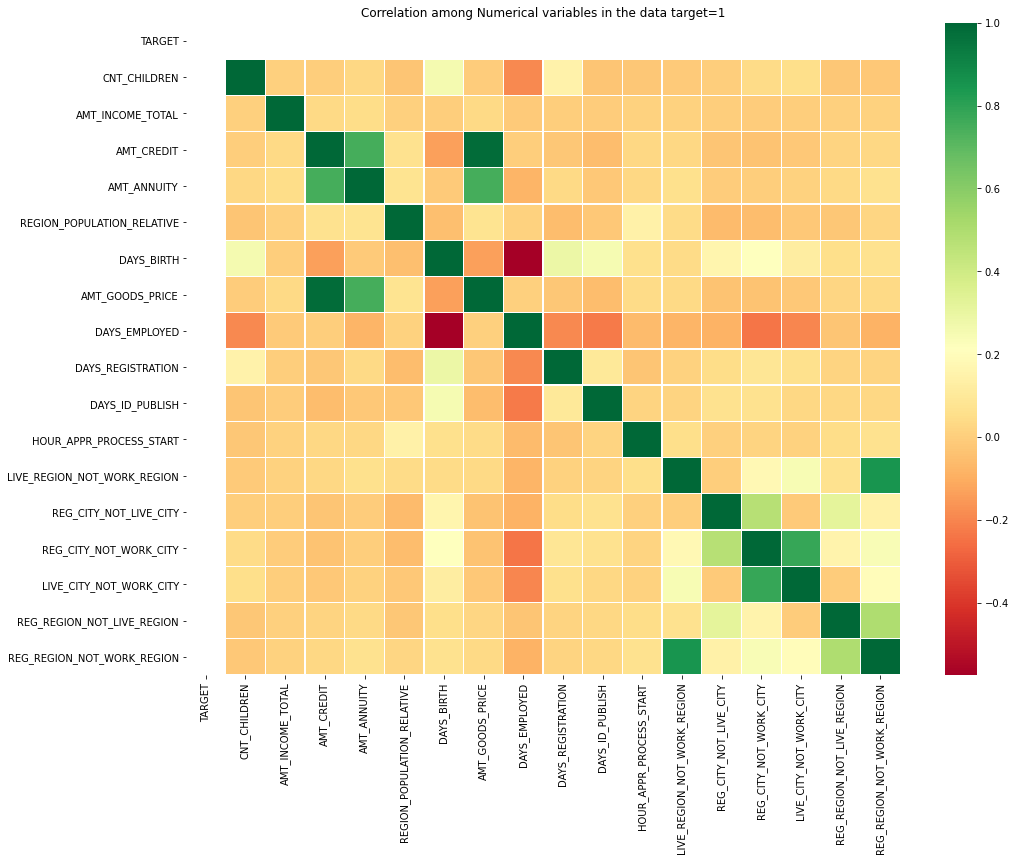

In [59]:
# Correlation in the data
plt.figure(figsize=(16,12))

plt.title("Correlation among Numerical variables in the data target=1")

#scaling/Normalizing the data for better correlations
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
data0 = pd.DataFrame(min_max_scaler.fit_transform(target1[numeric_columns]),columns=numeric_columns)

sns.heatmap(data0.corr(),cmap="RdYlGn",linewidths=0.3)

In [60]:
#top 20 pairs of variable with highest correlation
corrdf=target1.corr().unstack()
corrdf.sort_values(ascending=False).drop_duplicates()[:20]

SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.982783
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752295
AMT_ANNUITY                  AMT_CREDIT                    0.752195
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION    0.497937
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY        0.472052
                             REG_REGION_NOT_LIVE_REGION    0.322628
DAYS_REGISTRATION            DAYS_BIRTH                    0.289114
DAYS_BIRTH                   CNT_CHILDREN                  0.259109
                             DAYS_ID_PUBLISH               0.252863
LIVE_REGION_NOT_WORK_REGION  LIVE_CITY_NOT_WORK_CITY       0.244071
REG_CITY_NOT_WORK_CITY       REG_REGION_NOT_WORK_REGION    0.238676
                             DAYS_BIRTH         

## As we can see from above all the correlation heatmaps: 

1. Pairs of Variables that are positively Correlated:
(annuity amt, credit amt),(goods price, annuity amt),(goods price, credit amt) & other obvious correlations

2. Pairs of Variables that are negatively Correlated:
days employed is negatively related to a lot of variables 

3. With Target: No signficant correlation with any variables

## Univariate analysis for Numerical variables

### Using Boxplot to understand spread of numerical variables

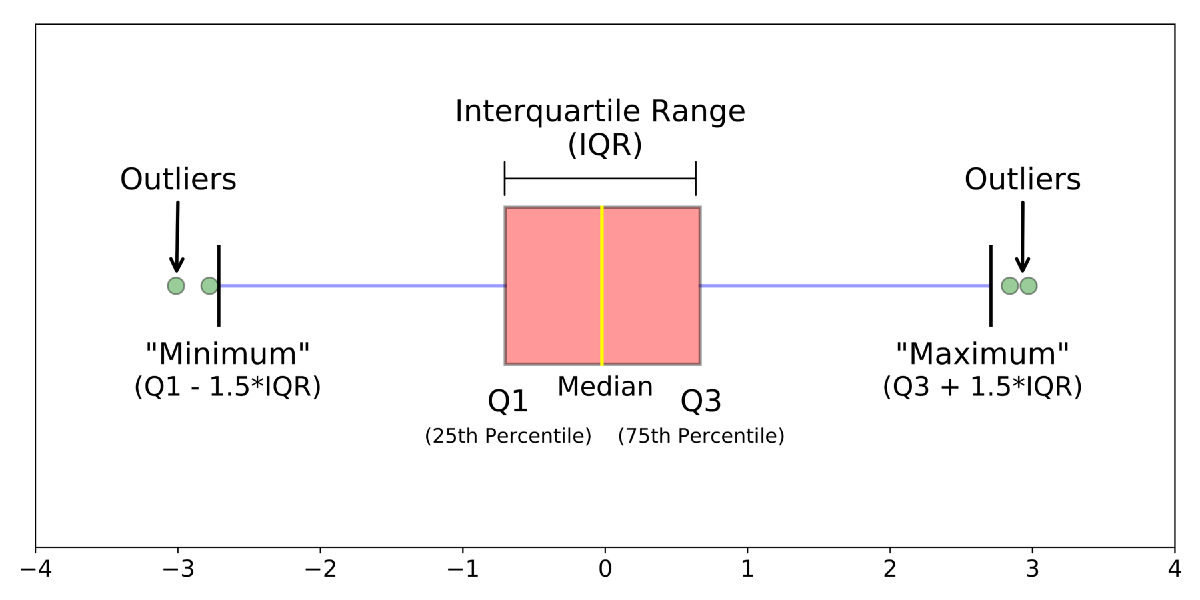

## It is helpful to check the boxplot after removing any outliers 

<AxesSubplot:title={'center':'target=1 (client with payment difficulties)'}, xlabel='AMT_INCOME_TOTAL'>

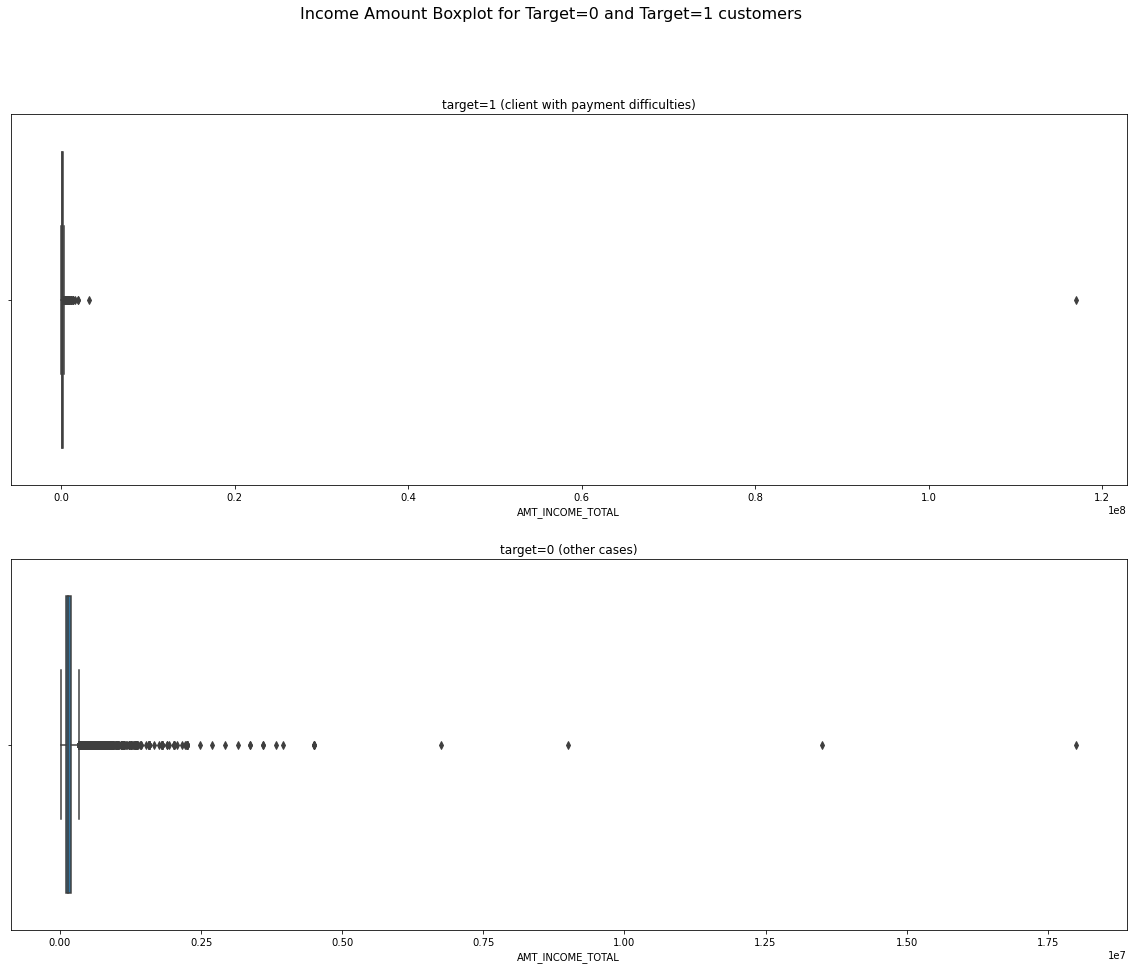

In [61]:
# Distribution of income amount

fig,ax=plt.subplots(2,1,figsize=(20,15))
fig.suptitle("Income Amount Boxplot for Target=0 and Target=1 customers", size=16)

ax[1].set_title("target=0 (other cases)")
ax[0].set_title("target=1 (client with payment difficulties)")

sns.boxplot(data = target0, x = 'AMT_INCOME_TOTAL',ax=ax[1])
sns.boxplot(data = target1, x = 'AMT_INCOME_TOTAL',ax=ax[0])

### the boxplot is ineffective to show the summary statistics of the data due to outliers present so we will draw the boxplot after removing the outliers

<AxesSubplot:title={'center':'target=1 (client with payment difficulties) without outliers'}, xlabel='AMT_INCOME_TOTAL'>

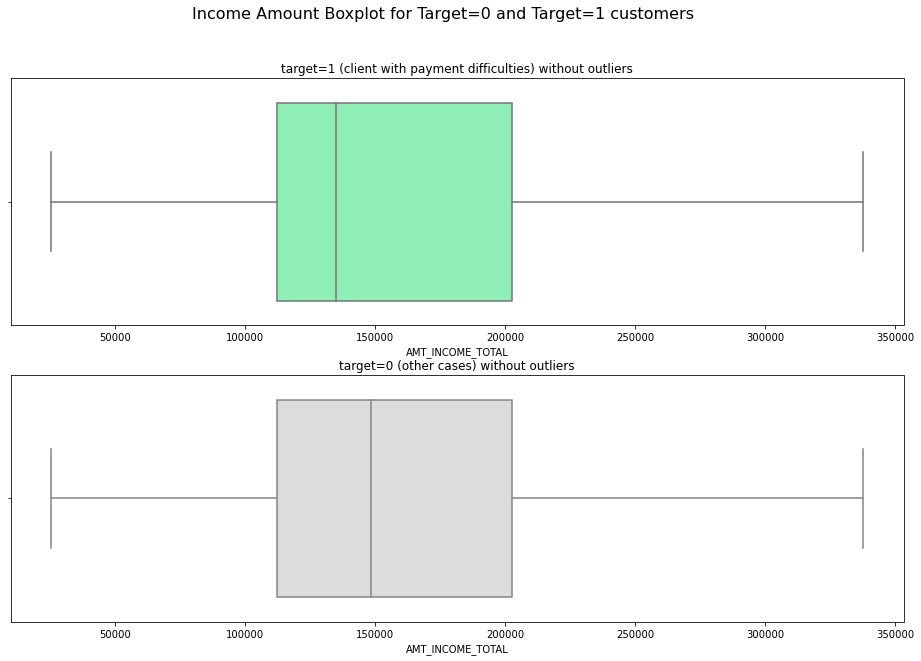

In [62]:
# Distribution of income amount with outliers removed

fig,ax=plt.subplots(2,1,figsize=(16,10))
fig.suptitle("Income Amount Boxplot for Target=0 and Target=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties) without outliers")
ax[1].set_title("target=0 (other cases) without outliers")


sns.boxplot(data = target0, x = 'AMT_INCOME_TOTAL',ax=ax[1],palette='coolwarm',showfliers=False)
sns.boxplot(data = target1, x = 'AMT_INCOME_TOTAL',ax=ax[0],palette='rainbow',showfliers=False)

### NOTE: Median Income amt is lesser for defaulters than in other cases, IQR is identical in both cases

<AxesSubplot:title={'center':'target=1 (client with payment difficulties)'}, xlabel='AMT_CREDIT'>

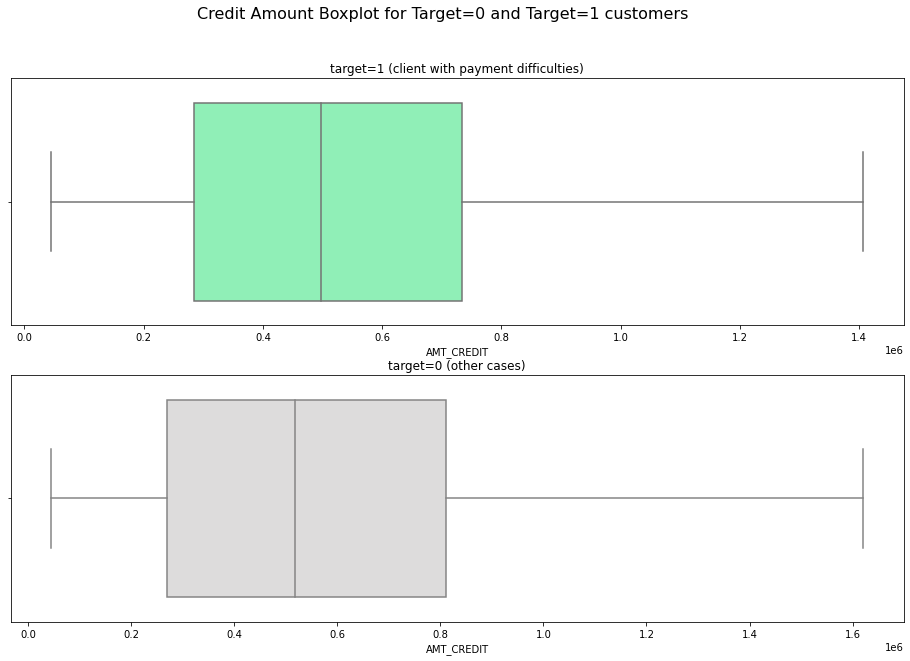

In [63]:
# Disrtibution of credit amount
fig,ax=plt.subplots(2,1,figsize=(16,10))
fig.suptitle("Credit Amount Boxplot for Target=0 and Target=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.boxplot(data = target0, x = 'AMT_CREDIT',ax=ax[1],palette='coolwarm',showfliers=False)
sns.boxplot(data = target1, x = 'AMT_CREDIT',ax=ax[0],palette='rainbow',showfliers=False)

### NOTE: Median Credit amt & Quartiles 1,3 is greater for defaulters than in other cases

<AxesSubplot:title={'center':'target=1 (client with payment difficulties)'}, xlabel='AMT_ANNUITY'>

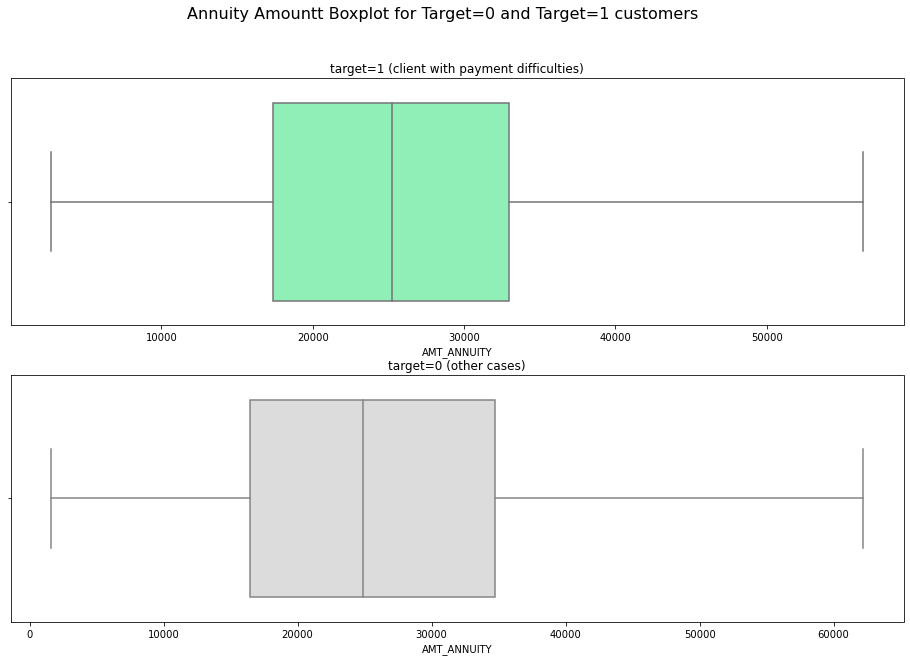

In [64]:
# Distribution of anuuity amount
fig,ax=plt.subplots(2,1,figsize=(16,10))
fig.suptitle("Annuity Amountt Boxplot for Target=0 and Target=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.boxplot(data = target0, x = 'AMT_ANNUITY',ax=ax[1],palette='coolwarm',showfliers=False)
sns.boxplot(data = target1, x = 'AMT_ANNUITY',ax=ax[0],palette='rainbow',showfliers=False)

<AxesSubplot:title={'center':'target=1 (client with payment difficulties)'}, xlabel='REGION_POPULATION_RELATIVE'>

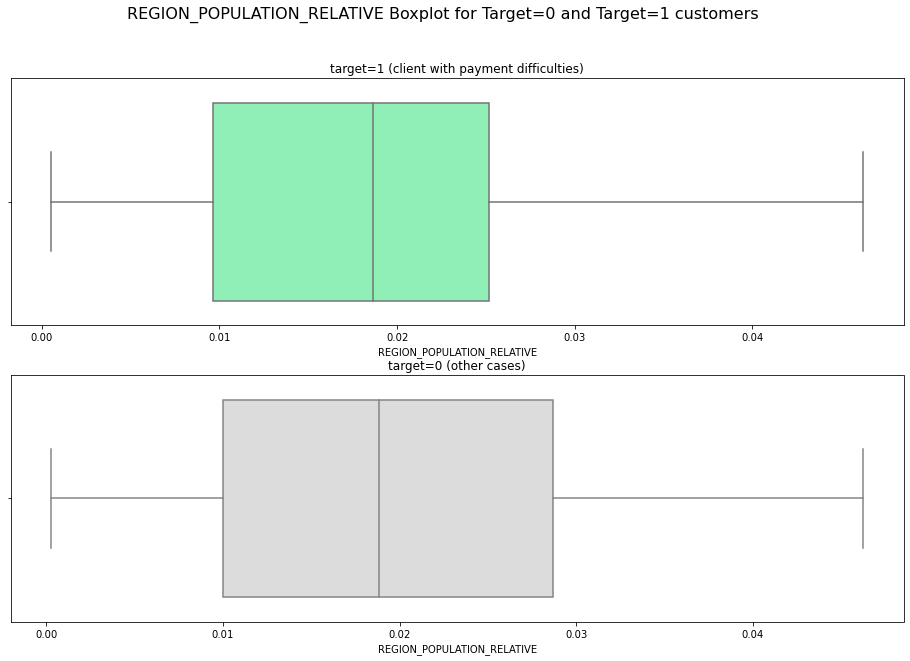

In [65]:
# Distribution of Region pouplation
fig,ax=plt.subplots(2,1,figsize=(16,10))
fig.suptitle("REGION_POPULATION_RELATIVE Boxplot for Target=0 and Target=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.boxplot(data = target0, x = 'REGION_POPULATION_RELATIVE',palette='coolwarm',ax=ax[1],showfliers=False)
sns.boxplot(data = target1, x = 'REGION_POPULATION_RELATIVE',palette='rainbow',ax=ax[0],showfliers=False)

### NOTE: Even though Median and minimum Population is similar in both cases, maximum population is lesser in defaulters case 

<AxesSubplot:title={'center':'target=1 (client with payment difficulties)'}, xlabel='DAYS_ID_PUBLISH'>

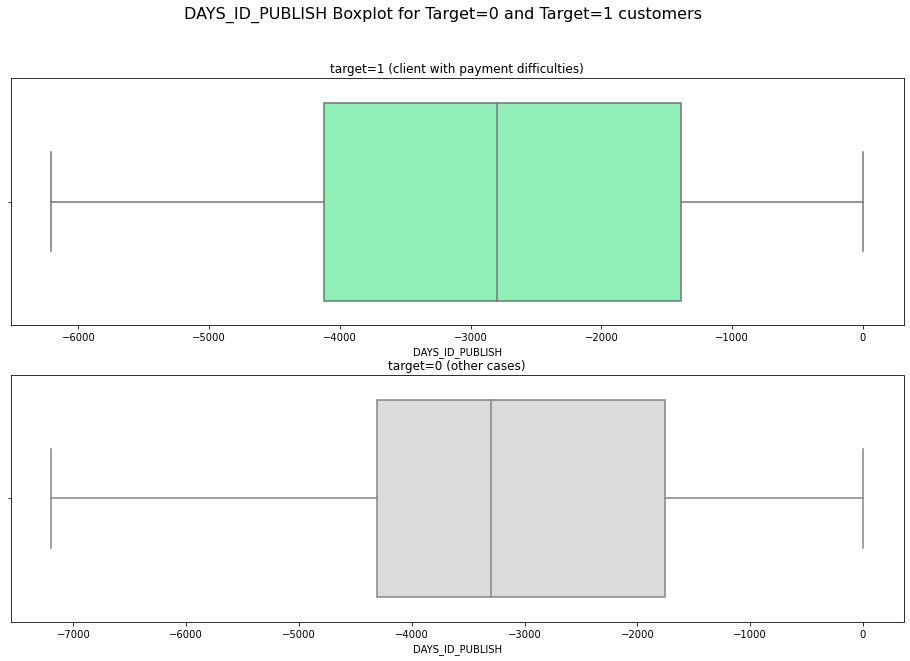

In [66]:
# Distribution of DAYS_ID_PUBLISH
fig,ax=plt.subplots(2,1,figsize=(16,10))
fig.suptitle("DAYS_ID_PUBLISH Boxplot for Target=0 and Target=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.boxplot(data = target0, x = 'DAYS_ID_PUBLISH',ax=ax[1],palette='coolwarm',showfliers=False)
sns.boxplot(data = target1, x = 'DAYS_ID_PUBLISH',ax=ax[0],palette='rainbow',showfliers=False)

<AxesSubplot:title={'center':'target=1 (client with payment difficulties)'}, xlabel='DAYS_EMPLOYED'>

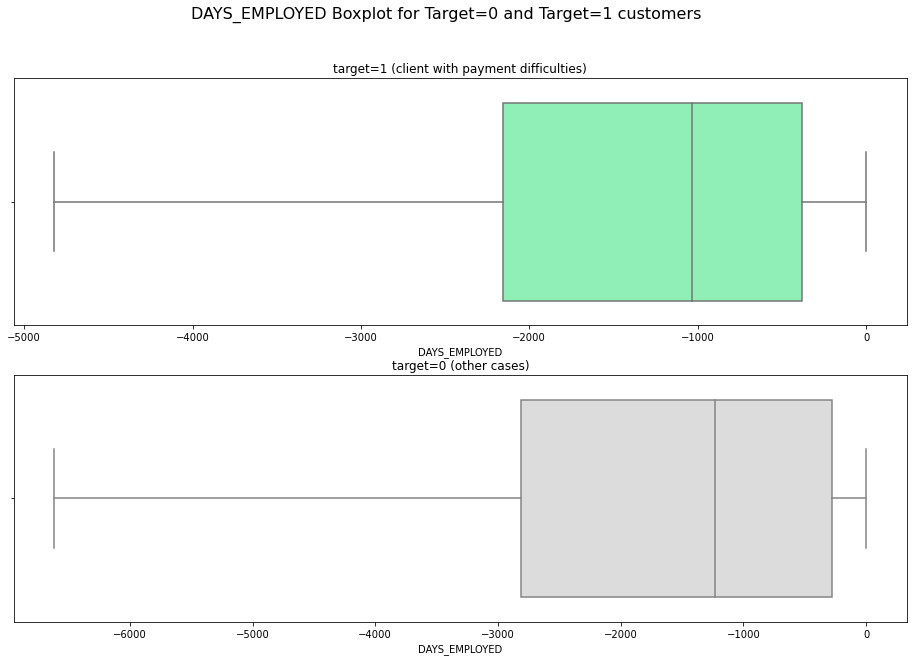

In [67]:
# Distribution of DAYS_EMPLOYED
fig,ax=plt.subplots(2,1,figsize=(16,10))
fig.suptitle("DAYS_EMPLOYED Boxplot for Target=0 and Target=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.boxplot(data = target0, x = 'DAYS_EMPLOYED',ax=ax[1],palette='coolwarm',showfliers=False)
sns.boxplot(data = target1, x = 'DAYS_EMPLOYED',ax=ax[0],palette='rainbow',showfliers=False)

In [68]:
#sns.boxenplot?

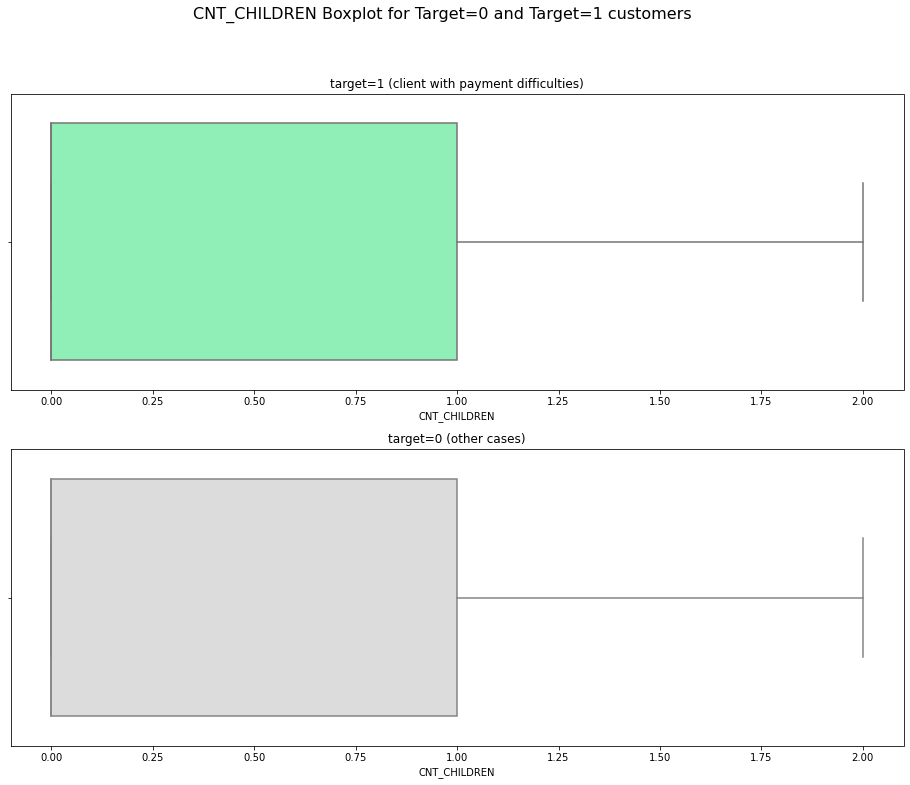

In [69]:
# Distribution of CNT_CHILDREN

col='CNT_CHILDREN'

fig, ax = plt.subplots(2,1, figsize = (16,12))

fig.suptitle("CNT_CHILDREN Boxplot for Target=0 and Target=1 customers", size=16)

ax[0].set_title("target=1 (client with payment difficulties)")
ax[1].set_title("target=0 (other cases)")

sns.boxplot(data = target0 , x= col, hue = 'NAME_EDUCATION_TYPE',palette='coolwarm',showfliers=False, ax=ax[1])
sns.boxplot(data = target1 , x= col, hue = 'NAME_EDUCATION_TYPE',palette='rainbow',showfliers=False, ax=ax[0])

plt.show()

## Bivariate analysis for numerical variables

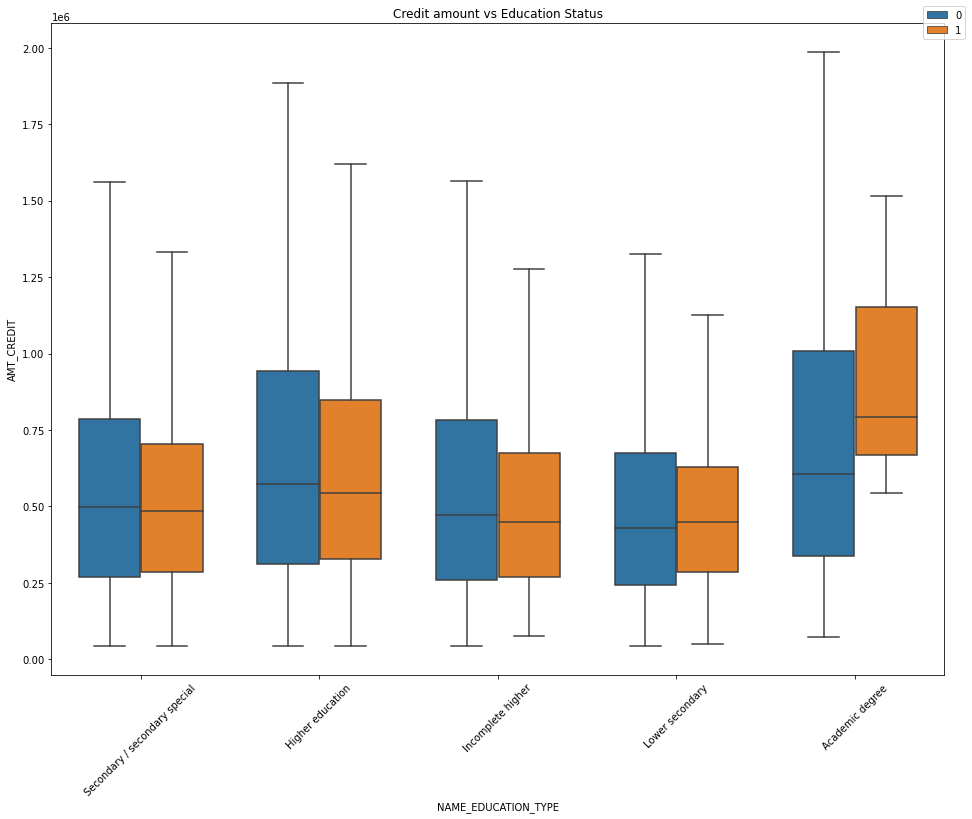

In [70]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='TARGET',width= 0.7,orient='v',showfliers=False)
plt.title('Credit amount vs Education Status')
plt.legend(loc='center', bbox_to_anchor=(1, 1))
plt.show()

### NOTE: People with higher edu and Academic Degree usually borrow more than others. People with Academic degree who borrow more than the "average academics" usually default. 

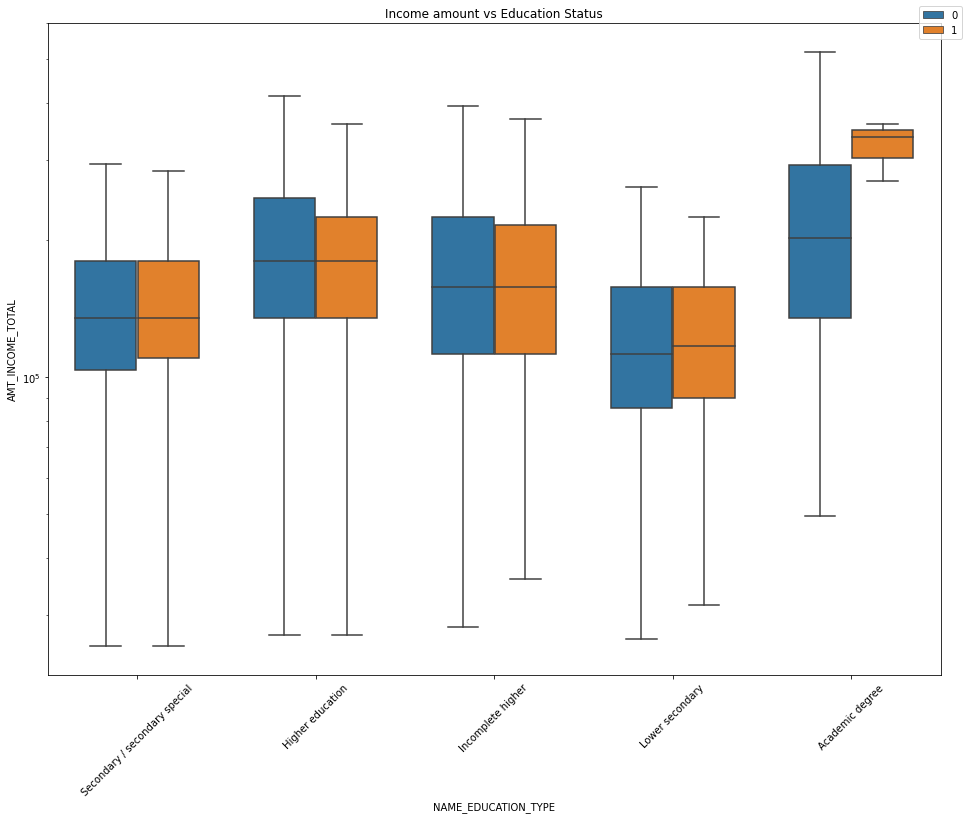

In [71]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',width= 0.7,orient='v',showfliers=False)
plt.title('Income amount vs Education Status')
plt.legend(loc='center', bbox_to_anchor=(1, 1))
plt.show()

### NOTE: People with higher edu and Academic Degree earn more than others. People with Academic degree who earn more than the "average academics" usually default. 

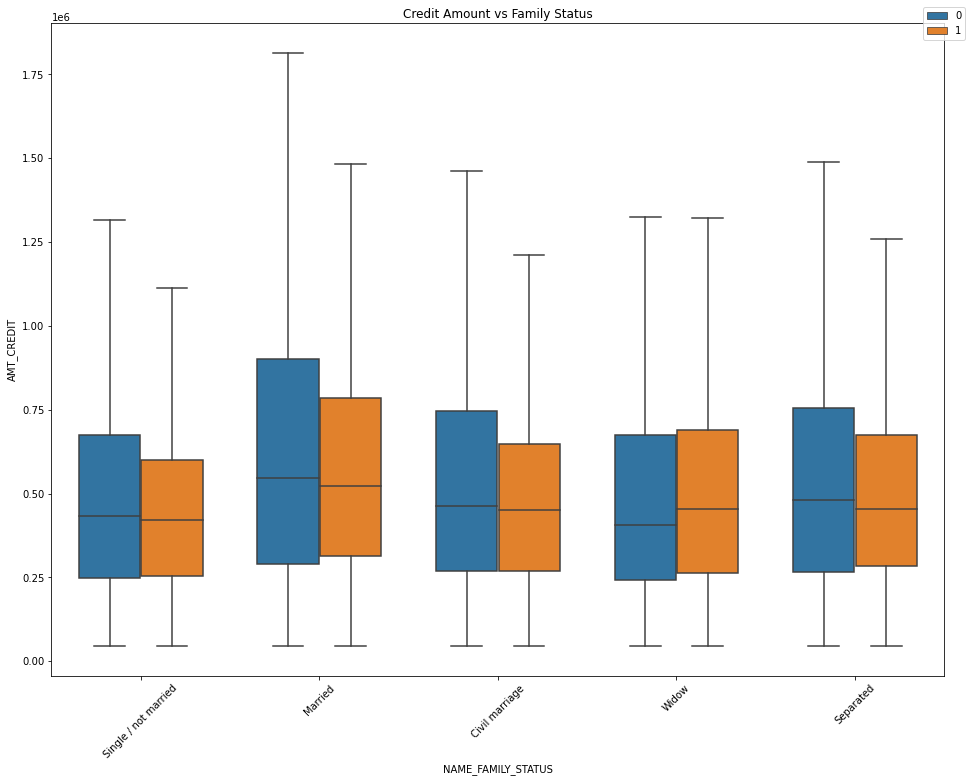

In [72]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='NAME_FAMILY_STATUS',y='AMT_CREDIT',hue ='TARGET',width= 0.7,orient='v',showfliers=False)
plt.title('Credit Amount vs Family Status')
plt.legend(loc='center', bbox_to_anchor=(1, 1))
plt.show()

### NOTE: Widowed people who borrow more tend to default more because they have to pay off the loan single-handedly on their own

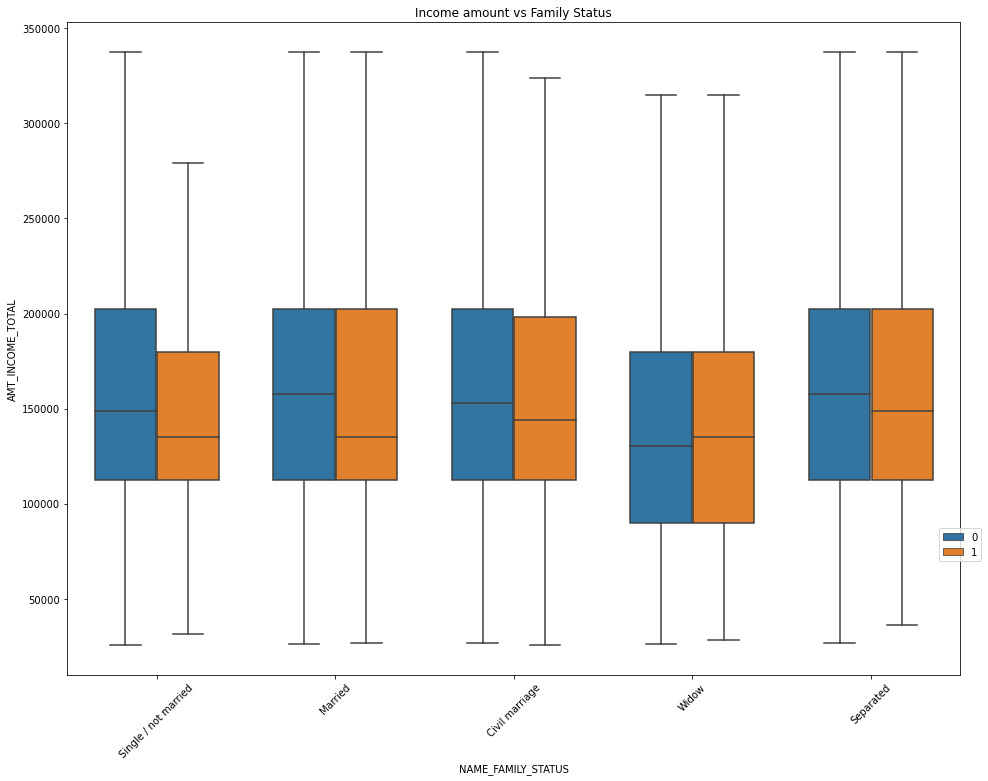

In [73]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
#plt.yscale('log')
sns.boxplot(data =df, x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL', hue ='TARGET',width= 0.7,orient='v',showfliers=False)
plt.title('Income amount vs Family Status')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

### NOTE: Bank should give out more loans to Single, Marrie and Separated people with higher median income as they are less likely to deafult on loans

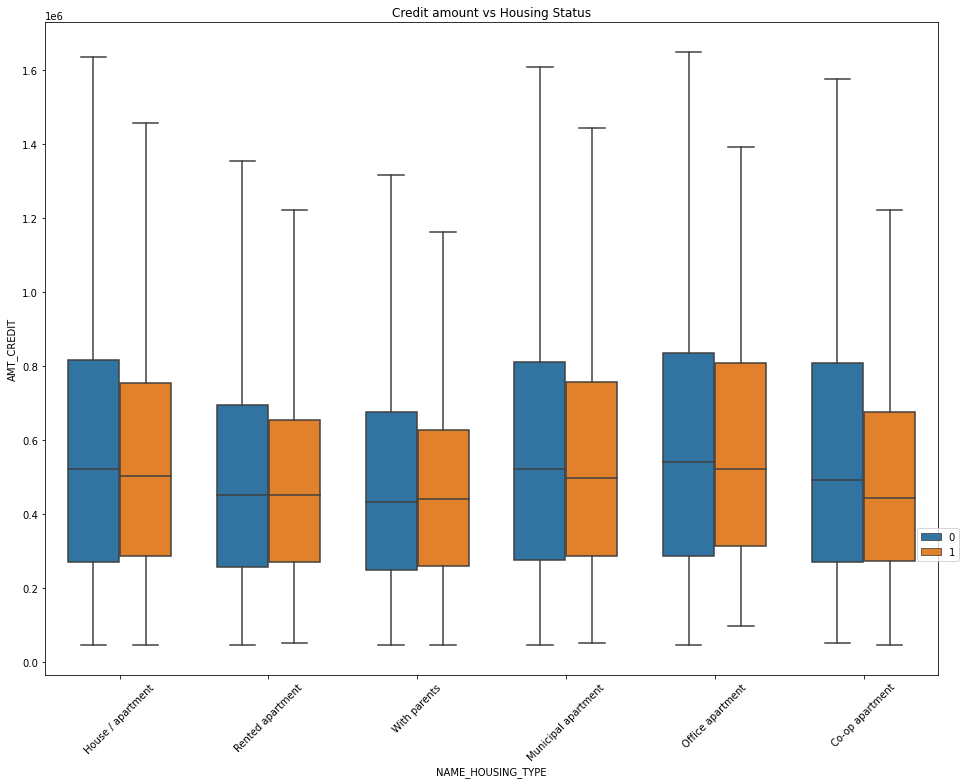

In [74]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
#plt.yscale('log')
sns.boxplot(data =df, x='NAME_HOUSING_TYPE',y='AMT_CREDIT', hue ='TARGET',width= 0.7,orient='v',showfliers=False)
plt.title('Credit amount vs Housing Status')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

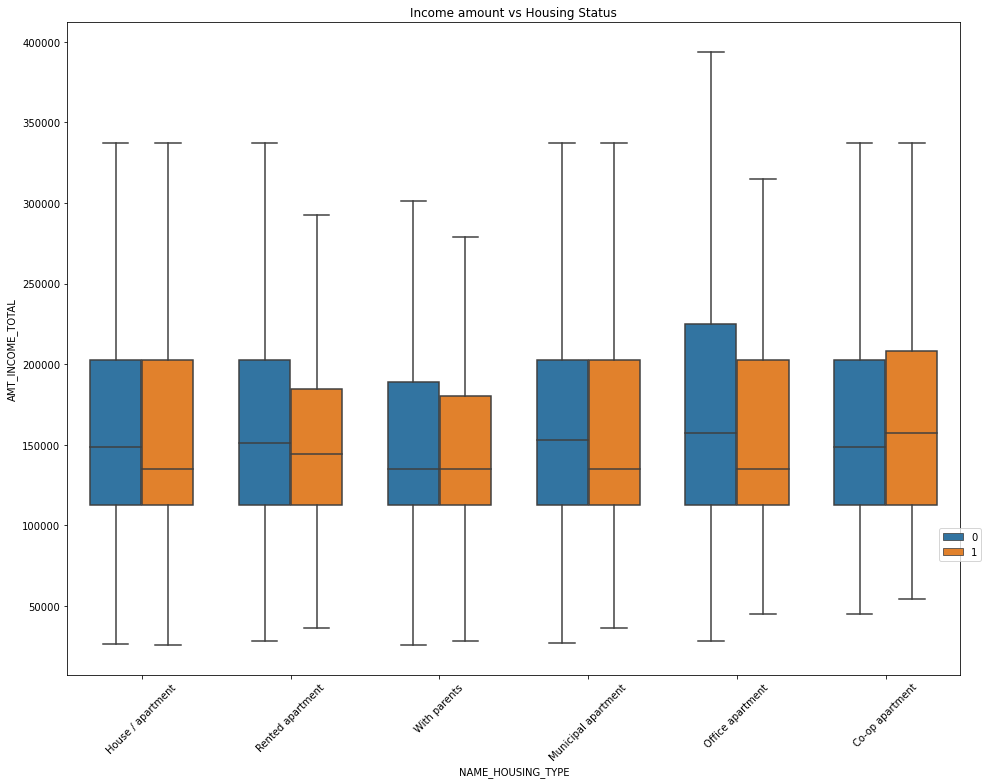

In [75]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
#plt.yscale('log')
sns.boxplot(data =df, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',width= 0.7,orient='v',showfliers=False)
plt.title('Income amount vs Housing Status')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

### NOTE: People living in Co-op apt with median Income more than others tend to default more

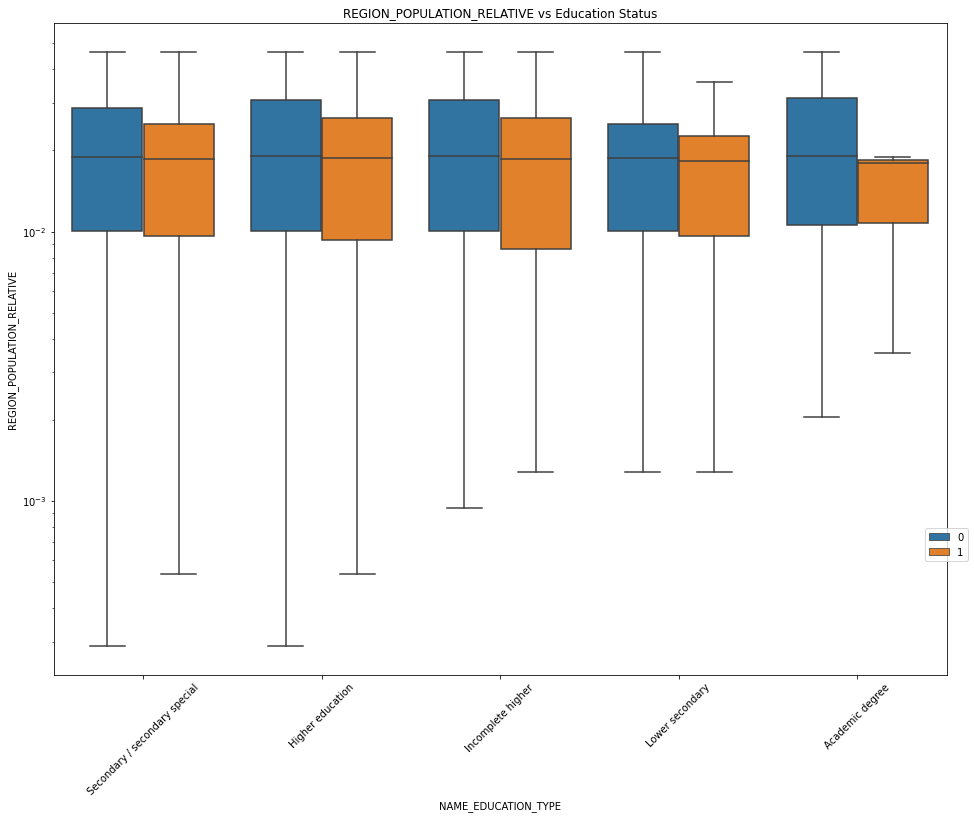

In [76]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y='REGION_POPULATION_RELATIVE', hue ='TARGET',orient='v',showfliers=False)
plt.title('REGION_POPULATION_RELATIVE vs Education Status')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

### NOTE: People with an Academic degree living in less populated area default more on their loans

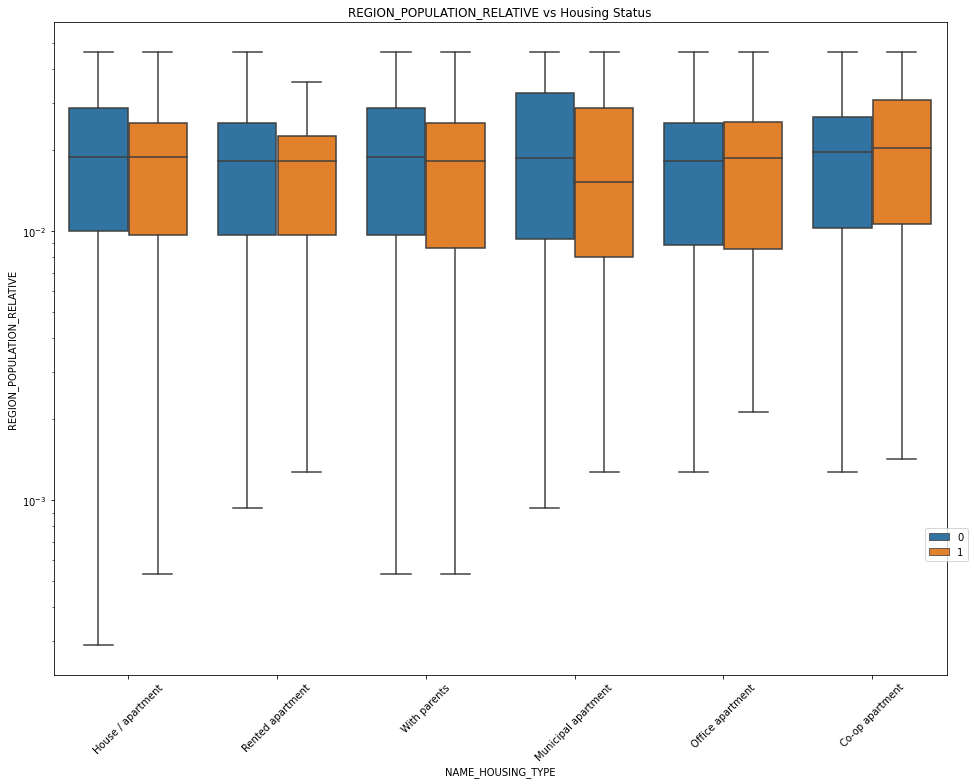

In [77]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df, x='NAME_HOUSING_TYPE',y='REGION_POPULATION_RELATIVE', hue ='TARGET',orient='v',showfliers=False)
plt.title('REGION_POPULATION_RELATIVE vs Housing Status')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

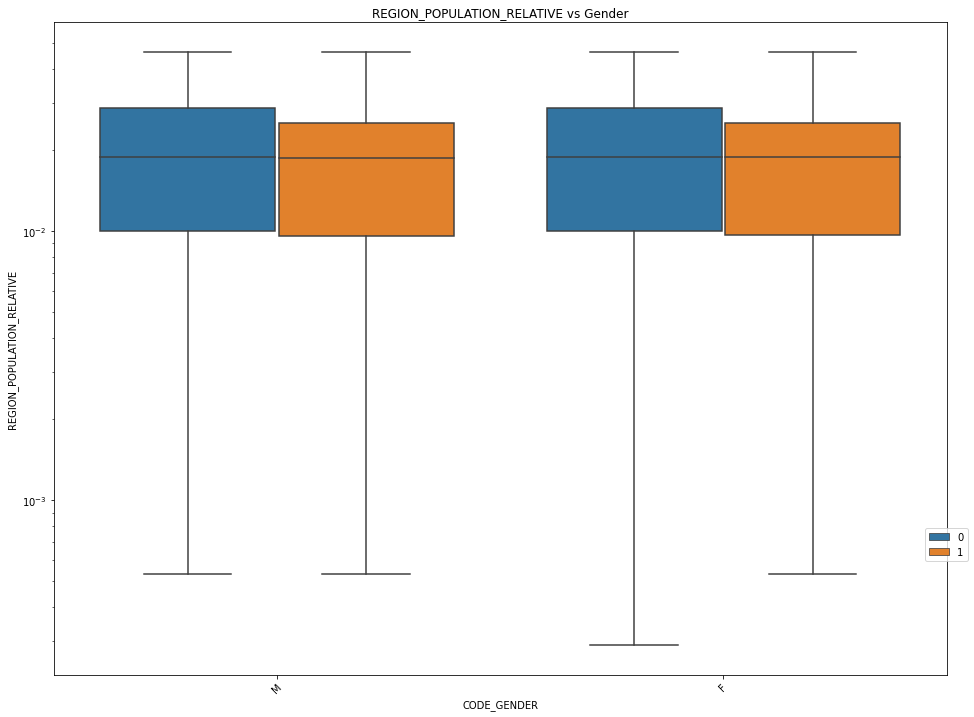

In [78]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df, x='CODE_GENDER',y='REGION_POPULATION_RELATIVE', hue ='TARGET',orient='v',showfliers=False)
plt.title('REGION_POPULATION_RELATIVE vs Gender')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

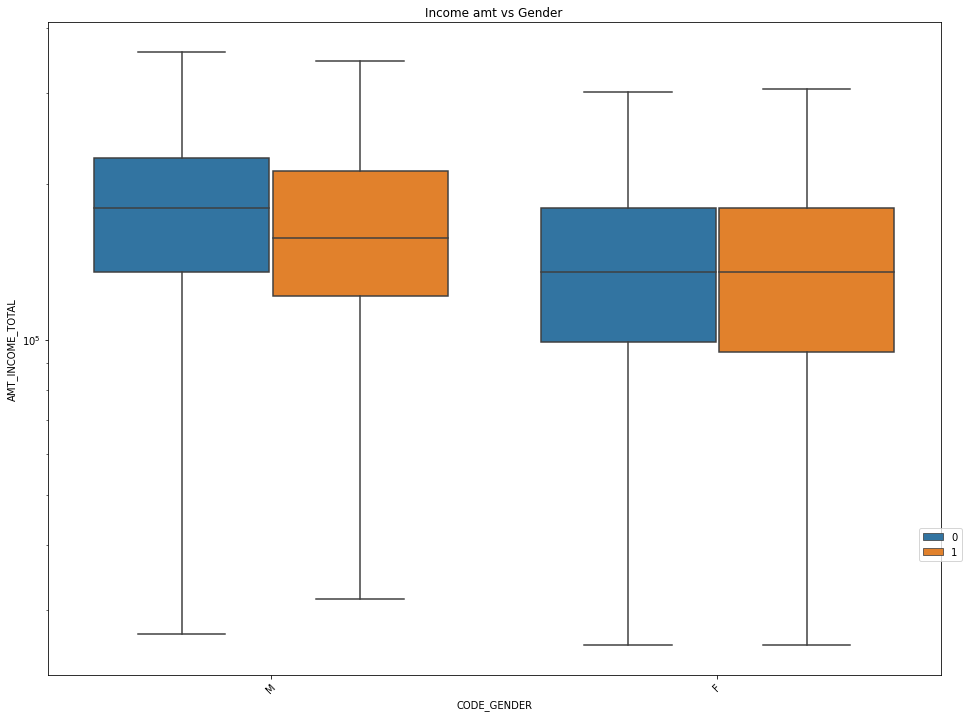

In [79]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df, x='CODE_GENDER',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v',showfliers=False)
plt.title('Income amt vs Gender')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

### NOTE: Males with median income lesser than other males tend to default more

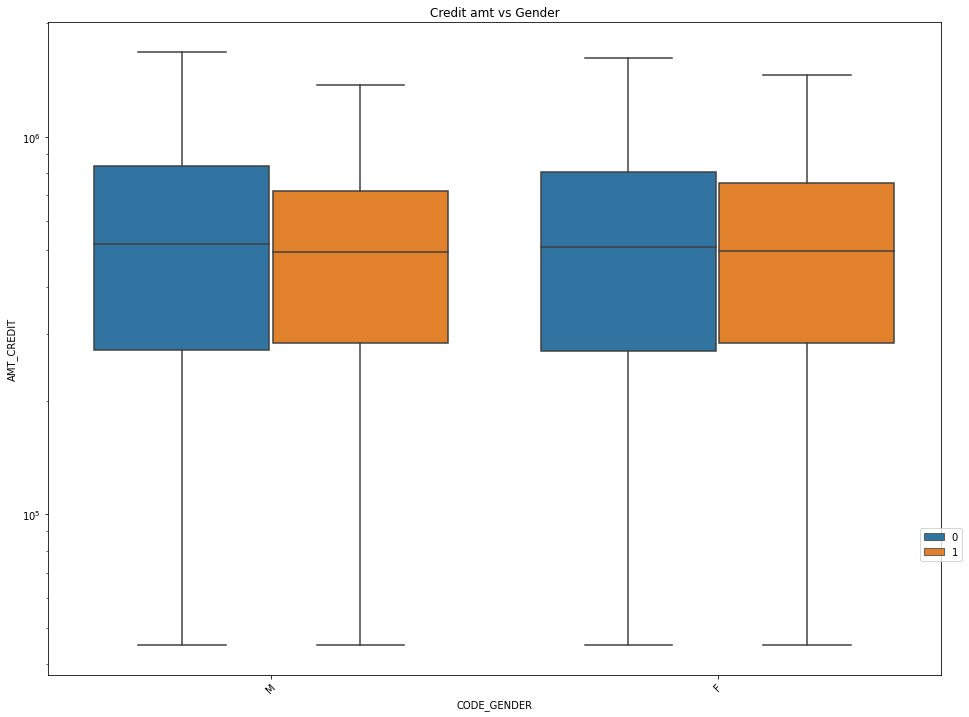

In [80]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df, x='CODE_GENDER',y='AMT_CREDIT', hue ='TARGET',orient='v',showfliers=False)
plt.title('Credit amt vs Gender')
plt.legend(loc='center', bbox_to_anchor=(1, 0.2))
plt.show()

### NOTE: Not much difference in borrowing w.r.t Gender because banks aren't allowed to discrimante on Gender for loan purposes

## Analysing Previous Loan Application Data

In [81]:
# Reading the dataset of previous application

df1=pd.read_csv("previous_application.csv")

In [82]:
df1.shape

(1670214, 37)

In [83]:
df1.isna().sum()/len(df1)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [84]:
# Cleaning the missing data

# Finding columns having more than 20% missing values
nacols = df1.isnull().sum()/len(df1) * 100
nacols = nacols[nacols.values > 0.2]
len(nacols)

14

In [85]:
# Removing these 14 columns with missing values >= 10%
df1.drop(labels = list(nacols.index),axis=1,inplace=True)
df1.shape    #ncols changes to 37 - 14 = 23

(1670214, 23)

In [86]:
for x in df1.columns:
    print(df1[x].value_counts())

1001961    1
1210139    1
1279781    1
1281828    1
1292067    1
          ..
2444802    1
2446849    1
2448896    1
1024863    1
1000983    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
310932     1
308885     1
317081     1
335520     1
350314     1
Name: SK_ID_CURR, Length: 338857, dtype: int64
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
431977.50         1
309064.50         1
142870.50         1
34421.40          1
84384.27          1
Name: AMT_APPLICATION, Length: 93885, dtype: int64
0.000          336768
45000.000       35051
225000.000      21094
450000.000      19954
135000.000      18720
                ...  
747252.000          1
398827.980          1
1663515.000         1
37616.1

In [87]:
# Now merging the Application dataset with previous appliaction dataset
new_df=pd.merge(left=df,right=df1,how='inner',on=['SK_ID_CURR'])

In [88]:
new_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1413696      456255       0           Cash loans           F            N   
1413697      456255       0           Cash loans           F            N   
1413698      456255       0           Cash loans           F            N   
1413699      456255       0           Cash loans           F            N   
1413700      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1413696               N             0          157500.0      675000.0   
1413697               N             0          157500.0      675000.0   
1413698               N             0          157500.0      675000.0   
1413699               N             0          157500.0      675000.0   
1413700               N             0          157500.0      675000.0   

         AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0            24700.5         351000.0               Working   
1            35698.5        1129500.0         State servant   
2            35698.5        1129500.0         State servant   
3            35698.5        1129500.0         State servant   
4             6750.0         135000.0               Working   
...              ...              ...                   ...   
1413696      49117.5         675000.0  Commercial associate   
1413697      49117.5         675000.0  Commercial associate   
1413698      49117.5         675000.0  Commercial associate   
1413699      49117.5         675000.0  Commercial associate   
1413700      49117.5         675000.0  Commercial associate   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0        Secondary / secondary special  Single / not married   
1                     Higher education               Married   
2                     Higher education               Married   
3                     Higher education               Married   
4        Secondary / secondary special  Single / not married   
...                                ...                   ...   
1413696               Higher education               Married   
1413697               Higher education               Married   
1413698               Higher education               Married   
1413699               Higher education               Married   
1413700               Higher education               Married   

         NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        House / apartment                    0.018801       -9461   
1        House / apartment                    0.003541      -16765   
2        House / apartment                    0.003541      -16765   
3        House / apartment                    0.003541      -16765   
4        House / apartment                    0.010032      -19046   
...                    ...                         ...         ...   
1413696  House / apartment                    0.046220      -16856   
1413697  House / apartment                    0.046220      -16856   
1413698  House / apartment                    0.046

In [89]:
new_df['TARGET'].value_counts()

0    1291341
1     122360
Name: TARGET, dtype: int64

In [90]:
new_df['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

In [91]:
new_df.replace("XAP","Other",inplace=True)
new_df.replace("XNA","Other",inplace=True)

**Performing univariate analysis**

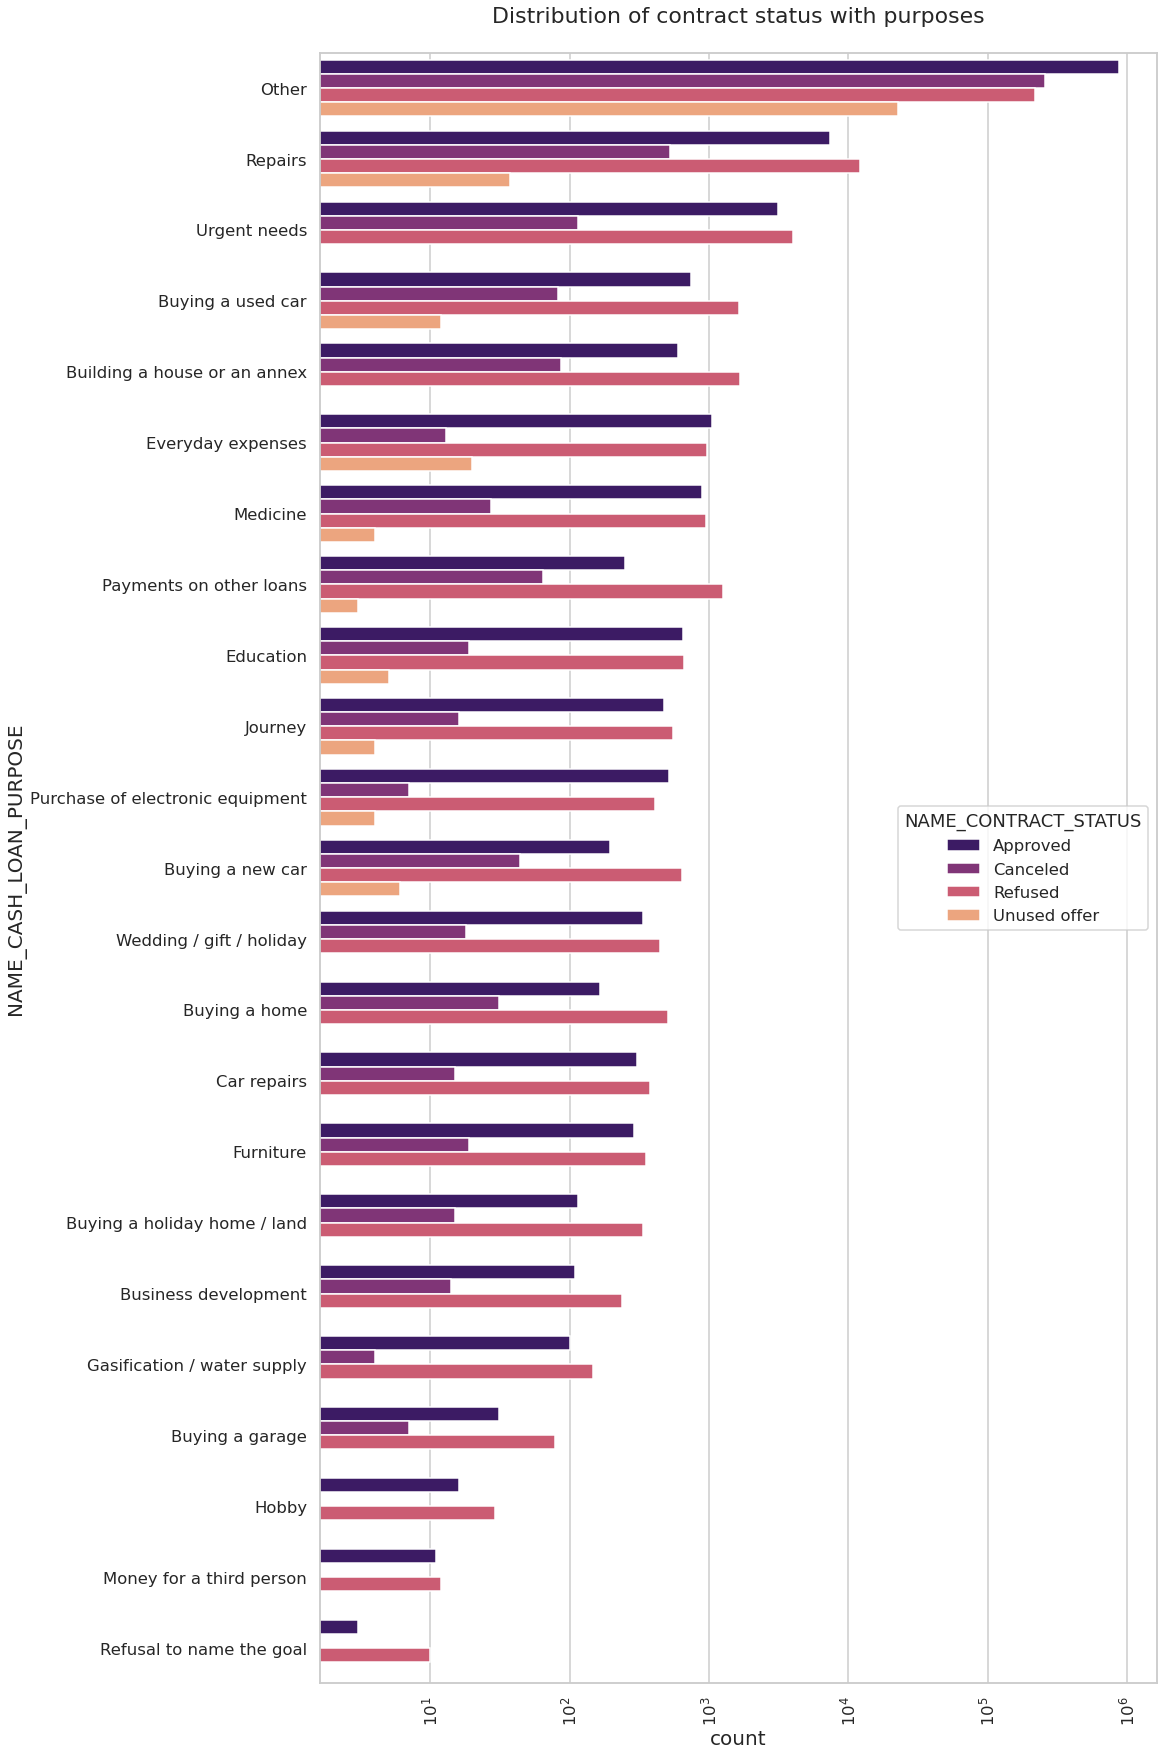

In [92]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Points to be concluded from above plot:

1. Most rejection of loans came from 'repairs','other'and 'urgent needs'.
2. Education purposes have equal number of approvals and rejections
3. Paying other loans and buying a new car has significant higher refusal than approvals.

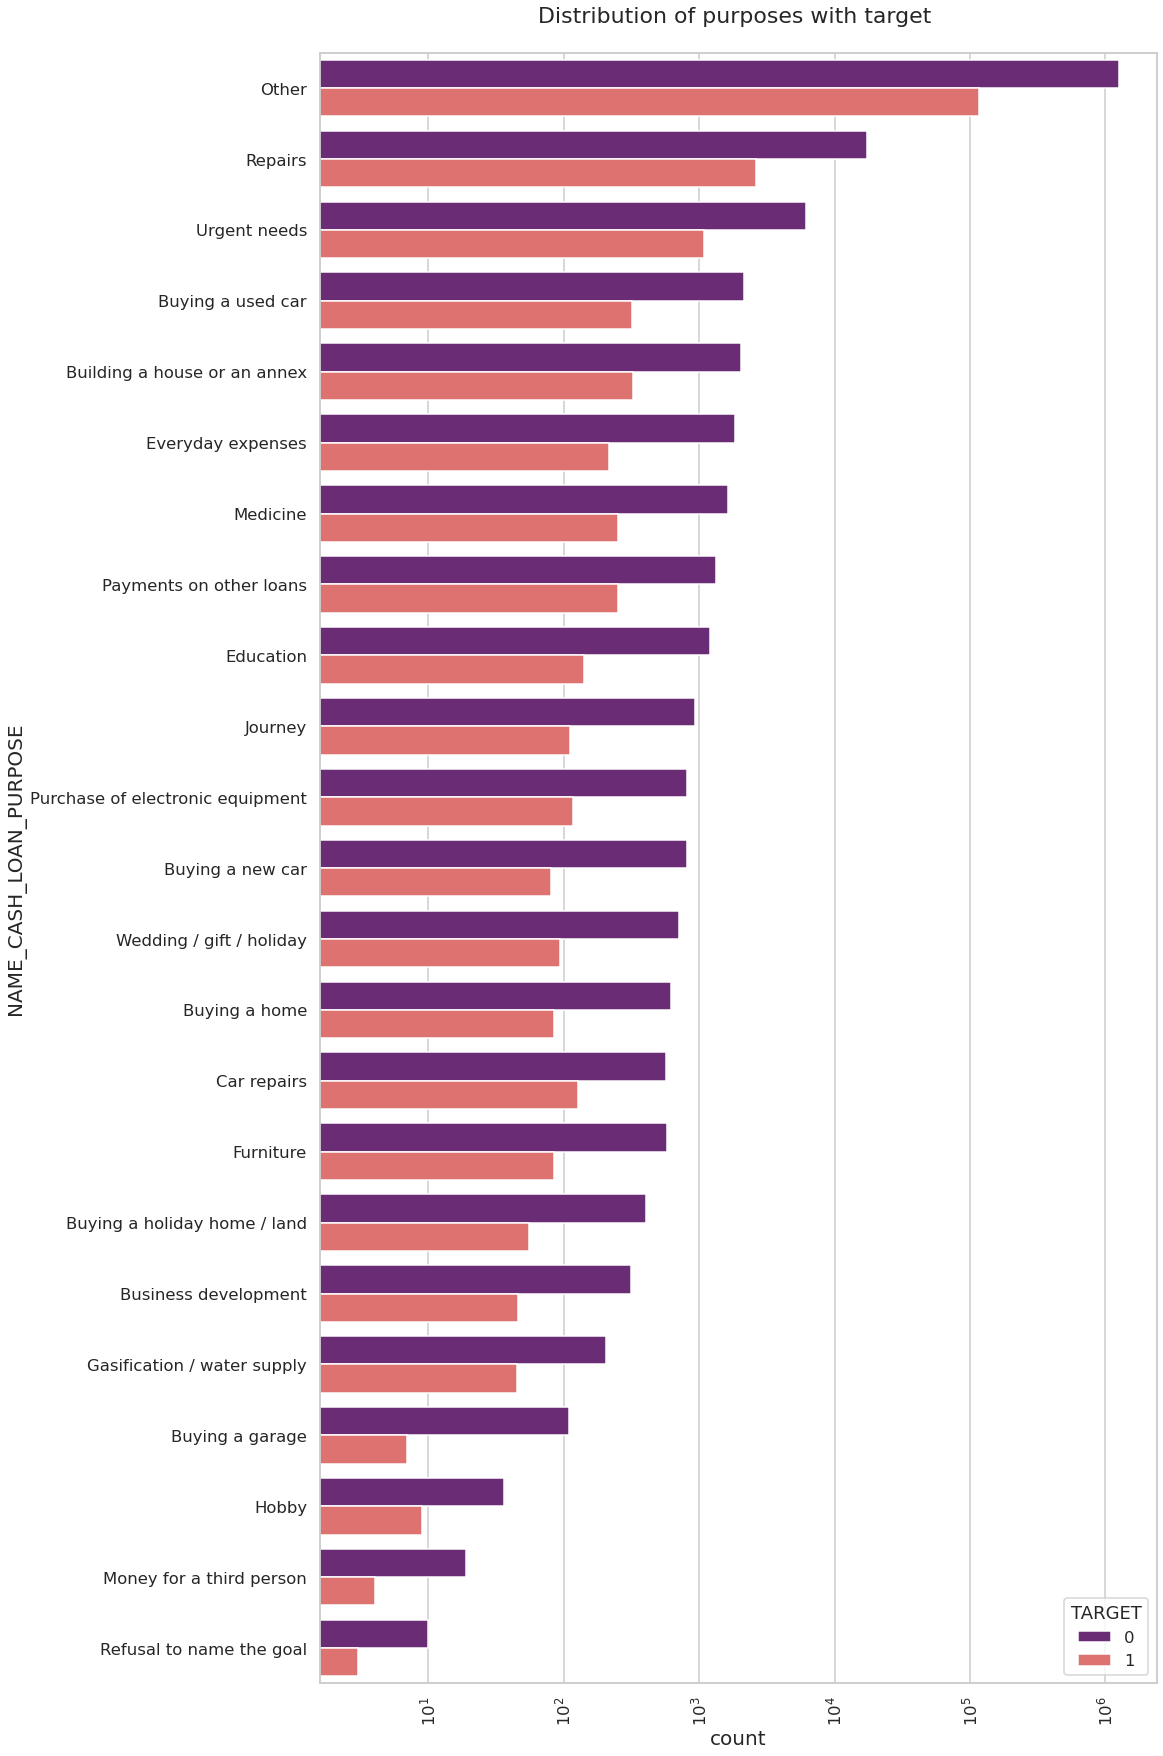

In [93]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

Few points we can conclude from above plot:

1. Loan purposes with 'Repairs' and 'Others' are facing more difficulites in payment on time.

<AxesSubplot:title={'center':'Distribution of Contract Status'}, xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

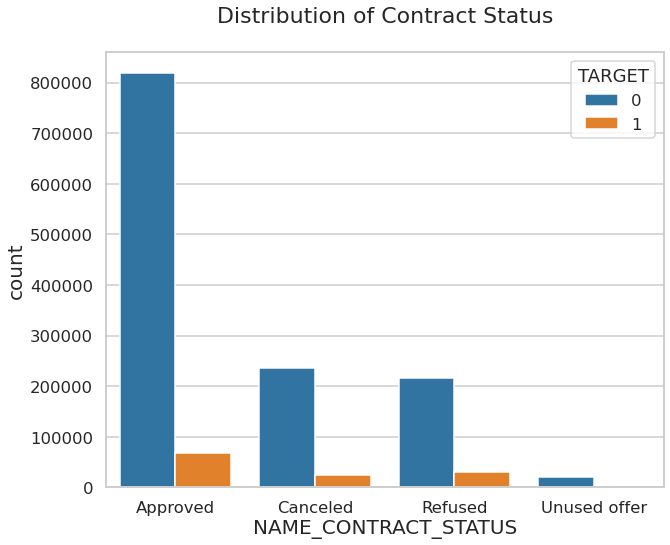

In [94]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Contract Status")
sns.countplot(data=new_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

<AxesSubplot:title={'center':'Distribution of Client Type'}, xlabel='NAME_CLIENT_TYPE', ylabel='count'>

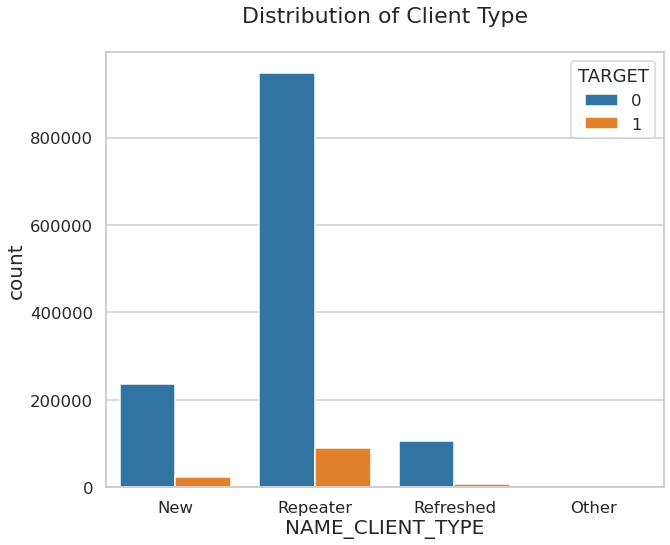

In [95]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Client Type")
sns.countplot(data=new_df,x='NAME_CLIENT_TYPE',hue='TARGET')

<AxesSubplot:title={'center':'Distribution of Product Type'}, xlabel='NAME_PRODUCT_TYPE', ylabel='count'>

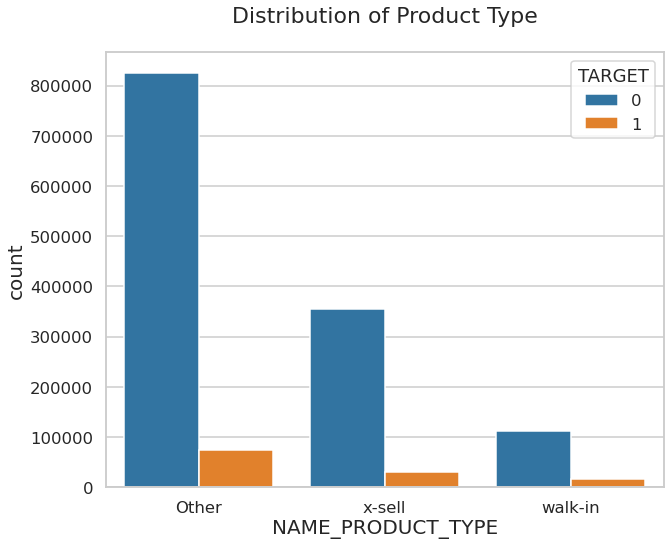

In [101]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Product Type")
sns.countplot(data=new_df,x='NAME_PRODUCT_TYPE',hue='TARGET')

**Performing bivariate analysis**

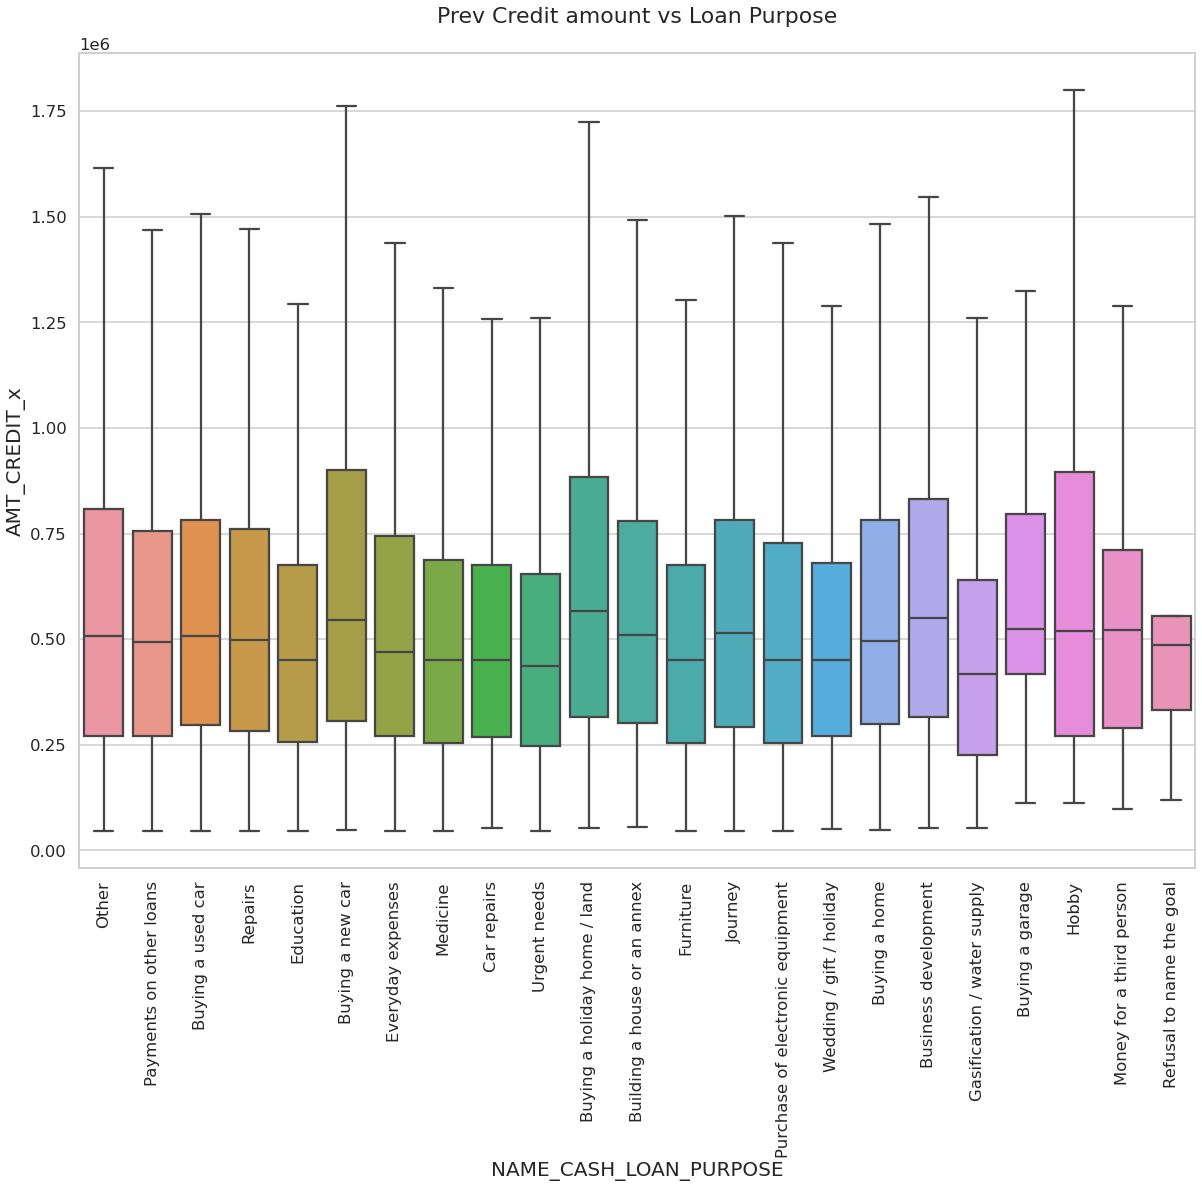

In [97]:

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
#plt.yscale('log')
sns.boxplot(data =new_df, width=0.8, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT_x',orient='v',showfliers=False)
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

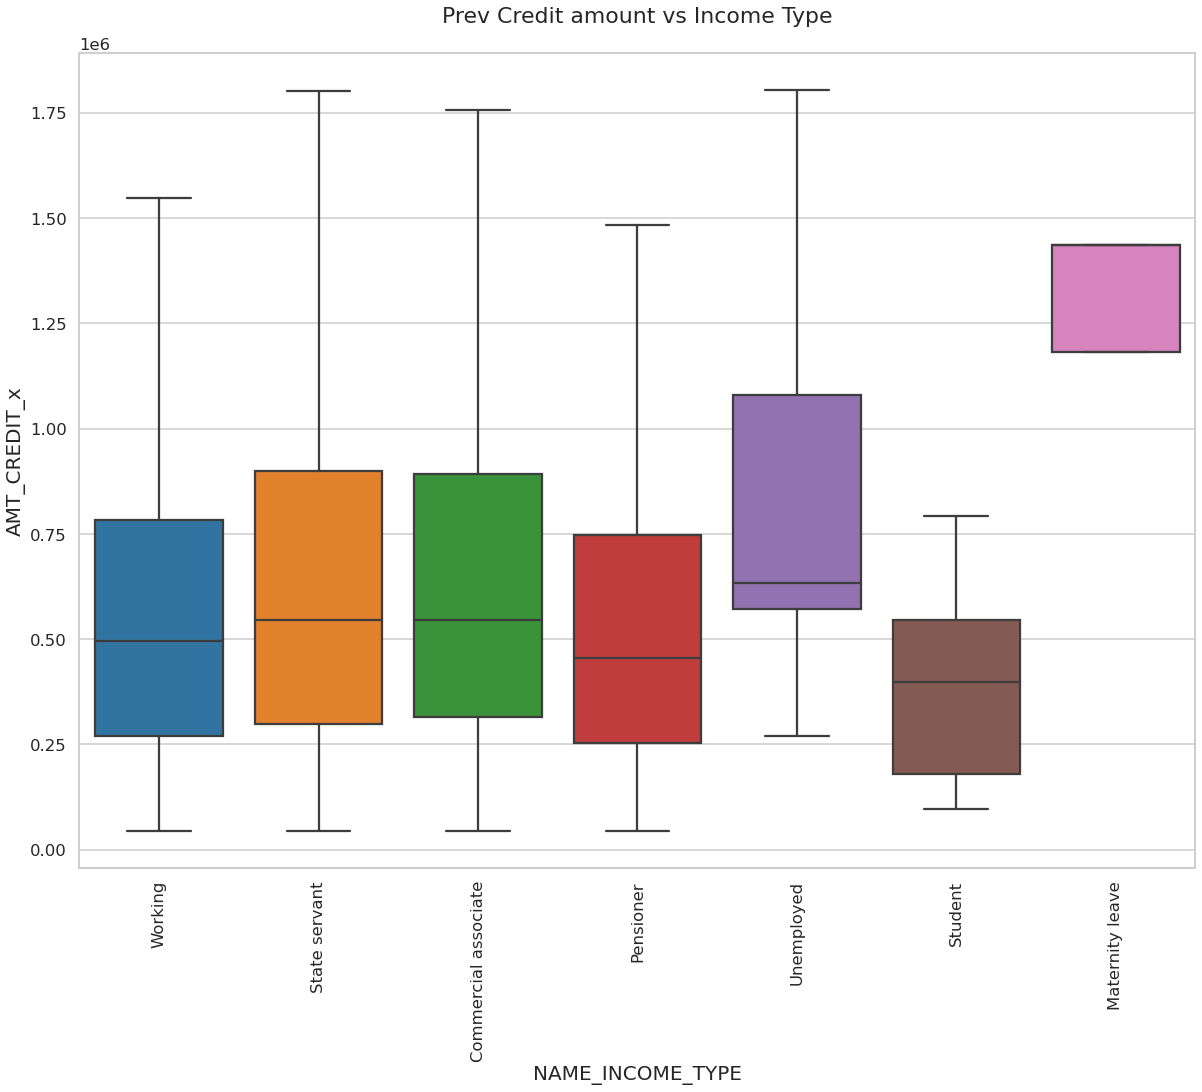

In [98]:

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
#plt.yscale('log')
sns.boxplot(data =new_df, width=0.8, x='NAME_INCOME_TYPE',y='AMT_CREDIT_x',orient='v',showfliers=False)
plt.title('Prev Credit amount vs Income Type')
plt.show()

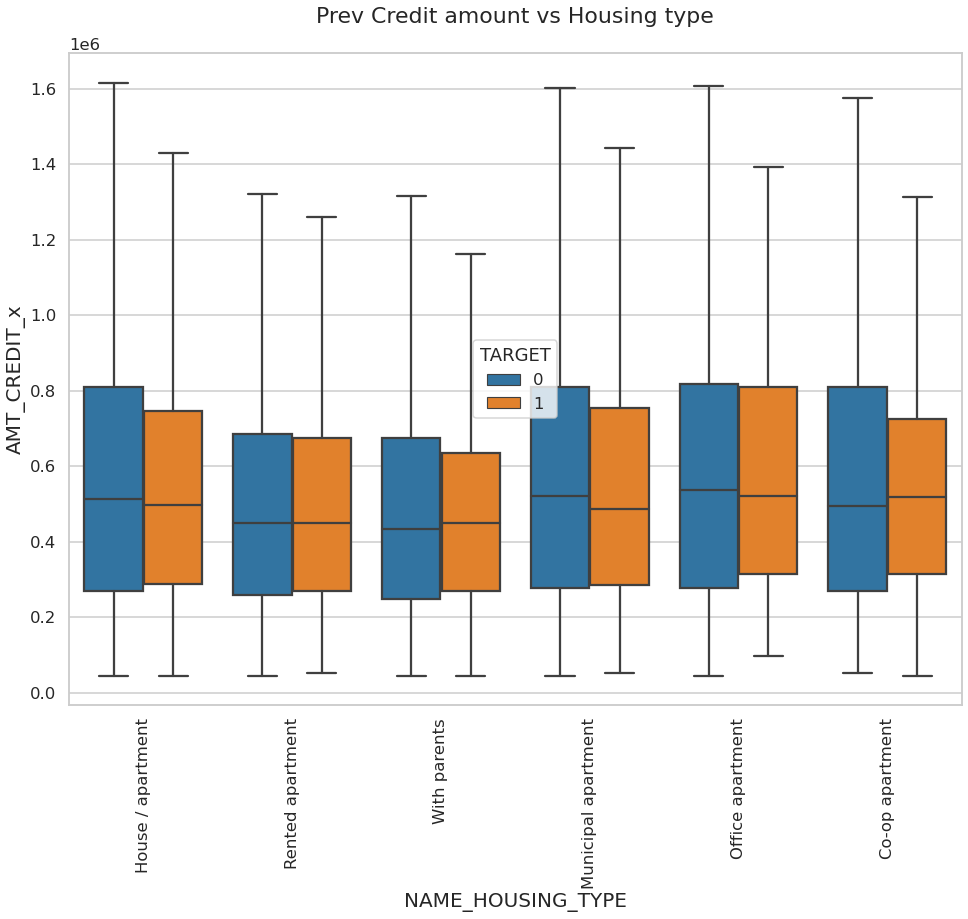

In [99]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =new_df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE',showfliers=False)
plt.title('Prev Credit amount vs Housing type')
plt.show()

# CONCLUSION - Driving factors for Loan Default Analysis

**1. NAME_INCOME_TYPE is an important driving factor. Most people are working class and they default a lot on their payments. And the bank should focus on Studnets, businessman, etc. as these people have practically no deafults on their repayments.

**2. NAME_CASH_LOAN_PURPOSE is an important driving factor. Repairs and Urgent needs categories have the highest defaults so the bank should pay attention to the purpose of the loan a lot. 

**3. NAME_EDUCATION_TYPE is an important driving factor. Almost all people that have "Secondary" level education default on their loans. Except people with Academic degree every other category has high default rate. So the bank should be extremely careful w.r.t education status while giving out loan 

**4. NAME_CONTRACT_STATUS is an extremely important driving factor. People whose application was previously 'Refused' are most likely to default on their future loans as indicated by highest (12%) deafult rate 

**5. ORGANIZATION_TYPE is a driving factor. Clients from the categories "Business Entity Type 3", "Self Employed" and "Others" have a high default rate on their loans. 